# Housing Price Prediction

### Problem statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Business goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The company wants to know:
- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.



In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.linear_model import (
    Ridge,
    Lasso,
    LinearRegression
)
from sklearn.model_selection import(
    train_test_split,
    GridSearchCV
)

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import scale
import seaborn as sns
from matplotlib import pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Data Understanding and Cleaning

- There are 81 fields from the raw dataset
- The target variable is `SalePrice`

In [2]:
raw_df = pd.read_csv("./data/train.csv")

In [3]:
# Info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
raw_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
raw_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
# Check NULL value from dataset
missing_df = pd.DataFrame(raw_df.isna().sum(), columns=["is_na"])
missing_df['na_percent'] = missing_df["is_na"] / len(raw_df) * 100
missing_df[missing_df["is_na"]>0]


is_na  na_percent
LotFrontage     259   17.739726
Alley          1369   93.767123
MasVnrType      872   59.726027
MasVnrArea        8    0.547945
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtExposure     38    2.602740
BsmtFinType1     37    2.534247
BsmtFinType2     38    2.602740
Electrical        1    0.068493
FireplaceQu     690   47.260274
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
PoolQC         1453   99.520548
Fence          1179   80.753425
MiscFeature    1406   96.301370

In [7]:
# Drop fields contain NA > 80%
raw_df = raw_df.drop([
    "PoolQC",
    "Fence",
    "Alley",
    "MiscFeature"
], axis=1)

In [8]:
# We see there are a NULL pattern in the list fields GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond
garage_null_df = raw_df[raw_df['GarageType'].isna()]

print(garage_null_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']])

# This is maybe a missing data and the missing percentage is 5.547945% so we will drop all rows contain null
raw_df = raw_df.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'])

     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39          NaN          NaN          NaN        NaN        NaN
48          NaN          NaN          NaN        NaN        NaN
78          NaN          NaN          NaN        NaN        NaN
88          NaN          NaN          NaN        NaN        NaN
89          NaN          NaN          NaN        NaN        NaN
...         ...          ...          ...        ...        ...
1349        NaN          NaN          NaN        NaN        NaN
1407        NaN          NaN          NaN        NaN        NaN
1449        NaN          NaN          NaN        NaN        NaN
1450        NaN          NaN          NaN        NaN        NaN
1453        NaN          NaN          NaN        NaN        NaN

[81 rows x 5 columns]


We read "data_description.md" file to undertand the meaning and correct datatype of each variables so we cast datatype or rename field by field

In [9]:
# ID we will not need this fields in prediction perspective
raw_df = raw_df.drop("Id", axis=1, errors='ignore')

# MSSubClass: Identifies the type of dwelling involved in the sale.
# Original value type is int by this a categorical value so 
# we cast to string
raw_df["MSSubClass"] = raw_df["MSSubClass"].astype(str)

# MSZoning: Identifies the general zoning classification of the sale.
raw_df["MSZoning"] = raw_df["MSZoning"].astype(str)

# LotFrontage: Linear feet of street connected to property
raw_df["LotFrontage"] = raw_df["LotFrontage"].astype(float)


# LotArea: Lot size in square feet
raw_df["LotArea"] = raw_df["LotArea"].astype(float)

# Street: Type of road access to property
raw_df["Street"] = raw_df["Street"].astype(str)


# LotShape: General shape of property
raw_df["LotShape"] = raw_df["LotShape"].astype(str)

# LandContour: Flatness of the property
raw_df["LandContour"] = raw_df["LandContour"].astype(str)

# Utilities: Type of utilities available
raw_df["Utilities"] = raw_df["Utilities"].astype(str)

# LotConfig: Lot configuration
raw_df["LotConfig"] = raw_df["LotConfig"].astype(str)

# LandSlope: Slope of property
raw_df["LandSlope"] = raw_df["LandSlope"].astype(str)

# Neighborhood: Physical locations within Ames city limits
raw_df["Neighborhood"] = raw_df["Neighborhood"].astype(str)

# Condition1: Proximity to various conditions
raw_df["Condition1"] = raw_df["Condition1"].astype(str)

# Condition1: Proximity to various conditions
raw_df["Condition2"] = raw_df["Condition2"].astype(str)

# BldgType: Type of dwelling
raw_df["BldgType"] = raw_df["BldgType"].astype(str)

# HouseStyle: Style of dwelling
raw_df["HouseStyle"] = raw_df["HouseStyle"].astype(str)


# OverallQual: Rates the overall material and finish of the house
# The original value is in int type but this a a scale format
# we will convert to string
raw_df["OverallQual"] = raw_df["OverallQual"].astype(str)

# YearBuilt: Original construction date
raw_df["YearBuilt"] = raw_df["YearBuilt"].astype(int)

# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
raw_df["YearRemodAdd"] = raw_df["YearRemodAdd"].astype(int)

# RoofStyle: Type of roof
raw_df["RoofStyle"] = raw_df["RoofStyle"].astype(str)

# RoofMatl: Roof material
raw_df["RoofMatl"] = raw_df["RoofMatl"].astype(str)

# Exterior1st: Exterior covering on house
raw_df["Exterior1st"] = raw_df["Exterior1st"].astype(str)


# Exterior2nd: Exterior covering on house (if more than one material)
raw_df["Exterior2nd"] = raw_df["Exterior2nd"].astype(str)

# MasVnrType: Masonry veneer type
raw_df["MasVnrType"] = raw_df["MasVnrType"].astype(str)

# MasVnrArea: Masonry veneer area in square feet
raw_df["MasVnrArea"] = raw_df["MasVnrArea"].astype(float)

# ExterQual: Evaluates the quality of the material on the exterior
raw_df["ExterQual"] = raw_df["MasVnrType"].astype(str)


# ExterCond: Evaluates the present condition of the material on the exterior
raw_df["ExterCond"] = raw_df["ExterCond"].astype(str)

# Foundation: Type of foundation
raw_df["Foundation"] = raw_df["Foundation"].astype(str)

# BsmtQual: Evaluates the height of the basement
raw_df["BsmtQual"] = raw_df["BsmtQual"].astype(str)

# BsmtCond: Evaluates the general condition of the basement
raw_df["BsmtCond"] = raw_df["BsmtCond"].astype(str)

# BsmtExposure: Refers to walkout or garden level walls
raw_df["BsmtExposure"] = raw_df["BsmtExposure"].astype(str)

# BsmtFinType1: Rating of basement finished area
raw_df["BsmtFinType1"] = raw_df["BsmtFinType1"].astype(str)

# BsmtFinSF1: Type 1 finished square feet
raw_df["BsmtFinSF1"] = raw_df["BsmtFinSF1"].astype(float)

# BsmtFinType2: Rating of basement finished area (if multiple types)
raw_df["BsmtFinType2"] = raw_df["BsmtFinType2"].astype(str)

# BsmtFinSF2: Type 2 finished square feet
raw_df["BsmtFinSF2"] = raw_df["BsmtFinSF2"].astype(float)

# BsmtUnfSF: Unfinished square feet of basement area
raw_df["BsmtUnfSF"] = raw_df["BsmtUnfSF"].astype(float)

# TotalBsmtSF: Total square feet of basement area
raw_df["TotalBsmtSF"] = raw_df["TotalBsmtSF"].astype(float)

# Heating: Type of heating
raw_df["Heating"] = raw_df["Heating"].astype(str)

# HeatingQC: Heating quality and condition
raw_df["HeatingQC"] = raw_df["HeatingQC"].astype(str)

# CentralAir: Central air conditioning
raw_df["CentralAir"] = raw_df["CentralAir"].map({"Y": 1, "N": 0})
raw_df["CentralAir"] = raw_df["CentralAir"].astype(str)


# Electrical: Electrical system
raw_df["Electrical"] = raw_df["Electrical"].astype(str)

# 1stFlrSF: First Floor square feet
raw_df["1stFlrSF"] = raw_df["1stFlrSF"].astype(float)

# 2ndFlrSF: Second floor square feet
raw_df["2ndFlrSF"] = raw_df["2ndFlrSF"].astype(float)

# LowQualFinSF: Low quality finished square feet (all floors)
raw_df["LowQualFinSF"] = raw_df["LowQualFinSF"].astype(float)

# GrLivArea: Above grade (ground) living area square feet
raw_df["GrLivArea"] = raw_df["GrLivArea"].astype(float)

# BsmtFullBath: Basement full bathrooms
raw_df["BsmtFullBath"] = raw_df["BsmtFullBath"].astype(float)

# BsmtHalfBath: Basement half bathrooms
raw_df["BsmtHalfBath"] = raw_df["BsmtHalfBath"].astype(float)

# FullBath: Full bathrooms above grade
raw_df["FullBath"] = raw_df["FullBath"].astype(float)

# HalfBath: Half baths above grade
raw_df["HalfBath"] = raw_df["HalfBath"].astype(float)

# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
# No bedroom fields in dataset just BedroomAbvGr
if "BedroomAbvGr" in raw_df.columns:
    raw_df["Bedroom"] = raw_df["BedroomAbvGr"]
    raw_df = raw_df.drop("BedroomAbvGr", axis=1)
raw_df["Bedroom"] = raw_df["Bedroom"].astype(float)

# Kitchen: Kitchens above grade
if "KitchenAbvGr" in raw_df.columns:
    raw_df["Kitchen"] = raw_df["KitchenAbvGr"]
    raw_df = raw_df.drop("KitchenAbvGr", axis=1)
raw_df["Kitchen"] = raw_df["Kitchen"].astype(float)


# KitchenQual: Kitchen quality
raw_df["KitchenQual"] = raw_df["KitchenQual"].astype(str)

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
raw_df["TotRmsAbvGrd"] = raw_df["TotRmsAbvGrd"].astype(float)

# Functional: Home functionality (Assume typical unless deductions are warranted)
raw_df["Functional"] = raw_df["Functional"].astype(str)

# Fireplaces: Number of fireplaces
raw_df["Fireplaces"] = raw_df["Fireplaces"].astype(float)

# FireplaceQu: Fireplace quality
raw_df["FireplaceQu"] = raw_df["FireplaceQu"].astype(str)

# GarageType: Garage location
raw_df["GarageType"] = raw_df["GarageType"].astype(str)


# GarageYrBlt: Year garage was built
raw_df["GarageYrBlt"] = raw_df["GarageYrBlt"].astype(int)

# GarageFinish: Interior finish of the garage
raw_df["GarageFinish"] = raw_df["GarageFinish"].astype(str)

# GarageCars: Size of garage in car capacity
raw_df["GarageCars"] = raw_df["GarageCars"].astype(float)

# GarageArea: Size of garage in square feet
raw_df["GarageArea"] = raw_df["GarageArea"].astype(float)

# GarageQual: Garage quality
raw_df["GarageQual"] = raw_df["GarageQual"].astype(str)


# GarageCond: Garage condition
raw_df["GarageCond"] = raw_df["GarageCond"].astype(str)

# PavedDrive: Paved driveway
raw_df["PavedDrive"] = raw_df["PavedDrive"].astype(str)

# WoodDeckSF: Wood deck area in square feet
raw_df["WoodDeckSF"] = raw_df["WoodDeckSF"].astype(float)

# OpenPorchSF: Open porch area in square feet
raw_df["OpenPorchSF"] = raw_df["OpenPorchSF"].astype(float)

# EnclosedPorch: Enclosed porch area in square feet
raw_df["EnclosedPorch"] = raw_df["EnclosedPorch"].astype(float)

# 3SsnPorch: Three season porch area in square feet
raw_df["3SsnPorch"] = raw_df["3SsnPorch"].astype(float)

# ScreenPorch: Screen porch area in square feet
raw_df["ScreenPorch"] = raw_df["ScreenPorch"].astype(float)

# PoolArea: Pool area in square feet
raw_df["PoolArea"] = raw_df["PoolArea"].astype(float)

# MiscVal: $Value of miscellaneous feature
raw_df["MiscVal"] = raw_df["MiscVal"].astype(float)

# MoSold: Month Sold (MM)
raw_df["MoSold"] = raw_df["MoSold"].astype(str)

# YrSold: Year Sold (YYYY)
raw_df["YrSold"] = raw_df["YrSold"].astype(str)

# SaleType: Type of sale
raw_df["SaleType"] = raw_df["SaleType"].astype(str)

# SaleCondition: Condition of sale
raw_df["SaleCondition"] = raw_df["SaleCondition"].astype(str)

## Data Cleaning

There are 19 fields contain Null value.
- For field contain more NA value > 80% we will drop these fields such as PoolQC, Fence, MiscFeature, Alley
- For numerical variables we fill NA with -1
- For categorical variables we fill NA with string NA

In [10]:
missing_df = pd.DataFrame(raw_df.isna().sum(), columns=["is_na"])
missing_df['na_percent'] = missing_df["is_na"] / len(raw_df) * 100
missing_df[missing_df["is_na"]>0]

is_na  na_percent
LotFrontage    252   18.274112
MasVnrArea       8    0.580131

In [11]:
# Drop fields contain NA > 80%
clean_df = raw_df

# Fill Null by a "NA" value for all categorical variables
categorical_vars = clean_df.select_dtypes(include=['object'])
for cv in categorical_vars.columns:
    clean_df[cv] = clean_df[cv].fillna("NA")


# Fill Null by a -1 value for all numerical variables
numerical_vars = clean_df.select_dtypes(include=['float64', 'int64'])
for nv in numerical_vars.columns:
    clean_df[nv] = clean_df[nv].fillna(clean_df[nv].median())



### See correlation between numerical variables

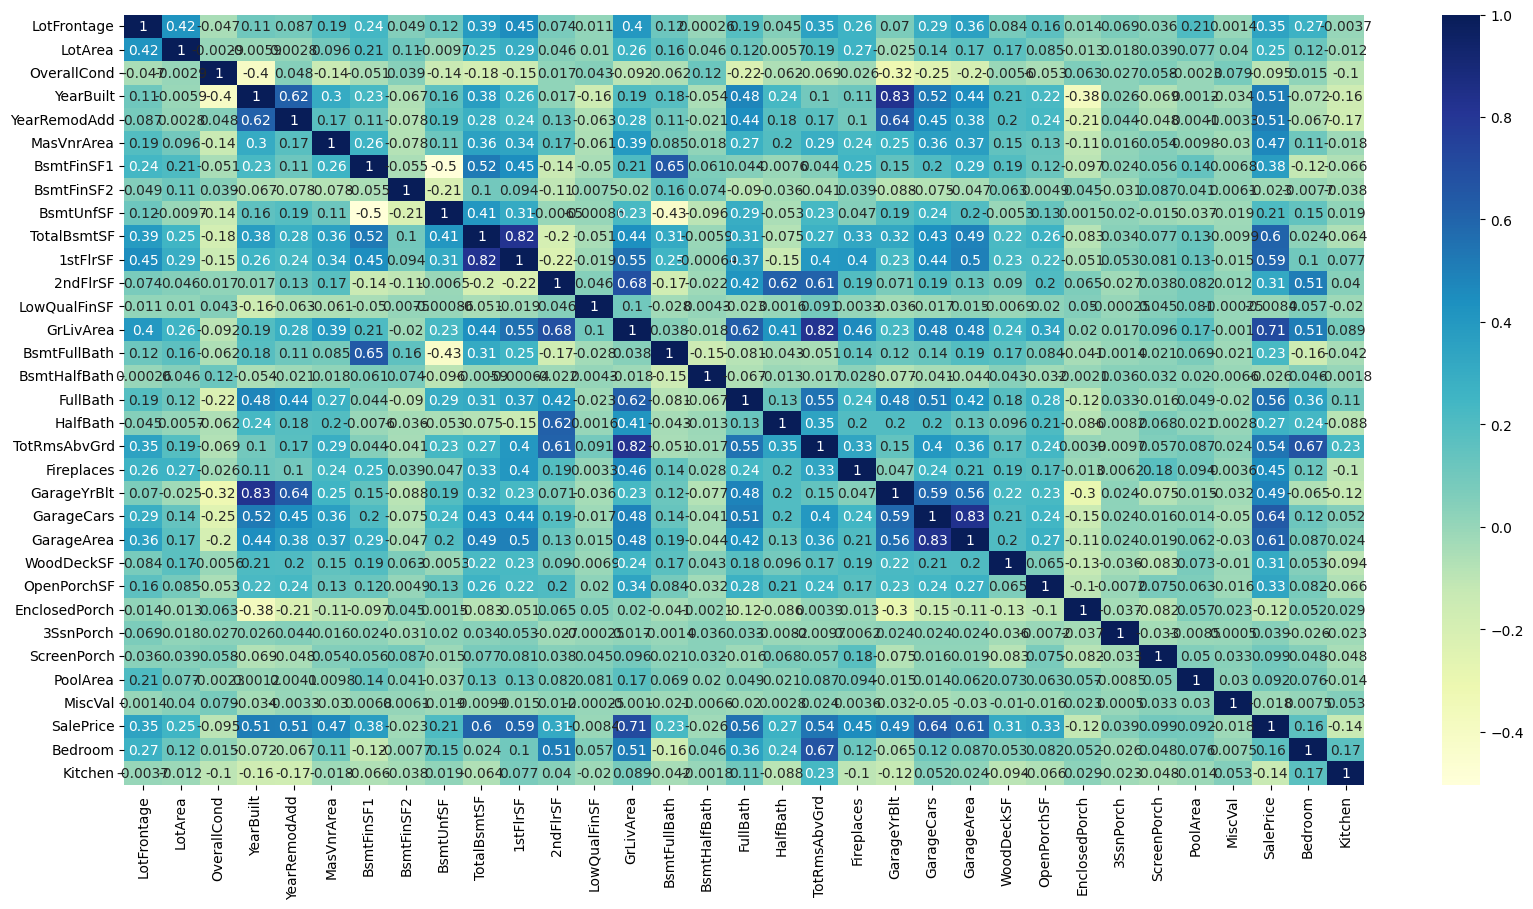

In [12]:
plt.figure(figsize = (20, 10))
sns.heatmap(numerical_vars.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [13]:
# From heatmap we see there are some variables have high correlation with each other, 
# we will remove one in the pair has correlation greater than 80%
clean_df = clean_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'])

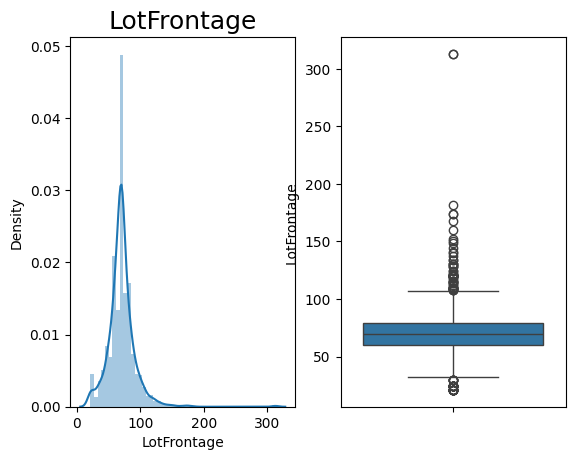

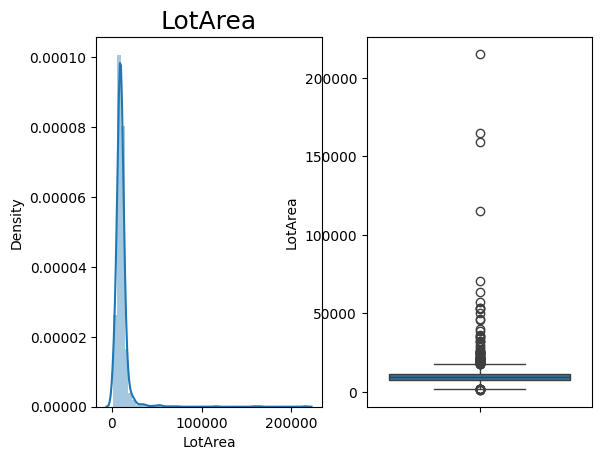

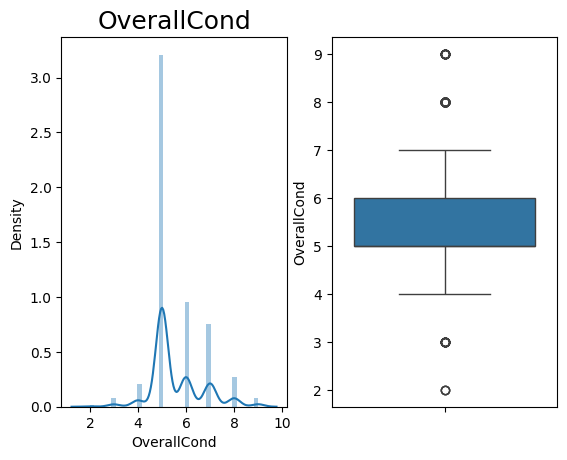

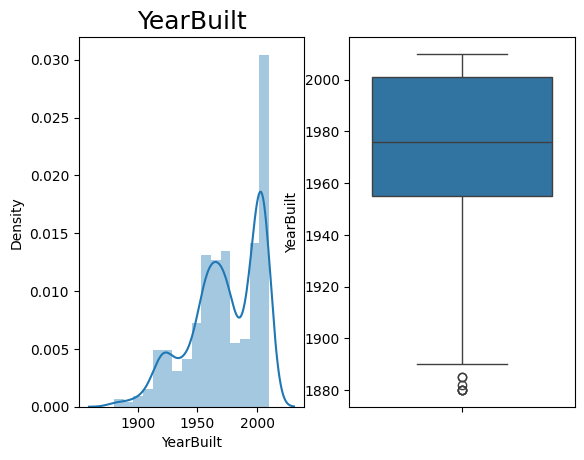

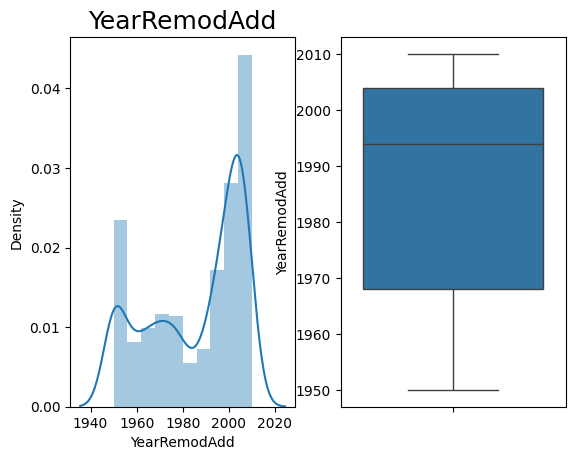

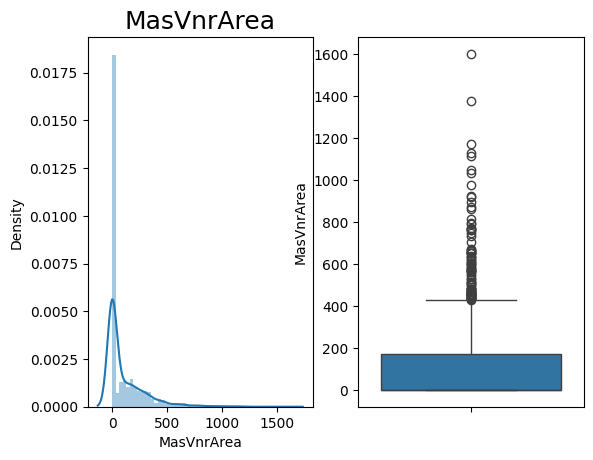

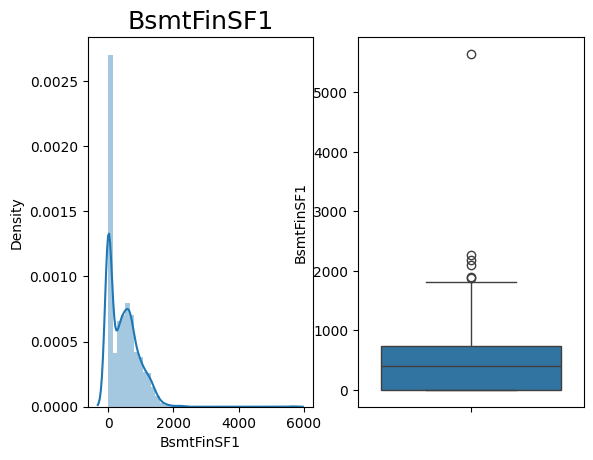

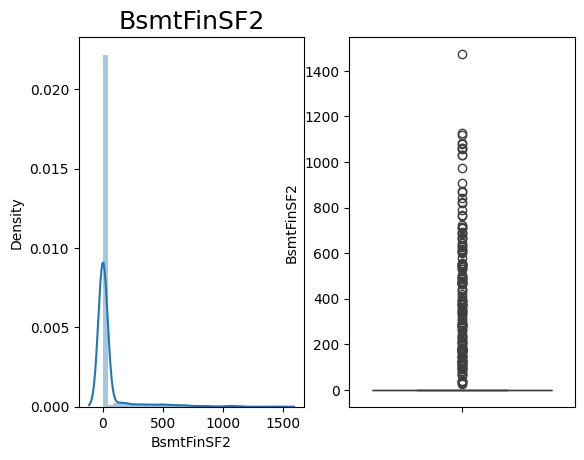

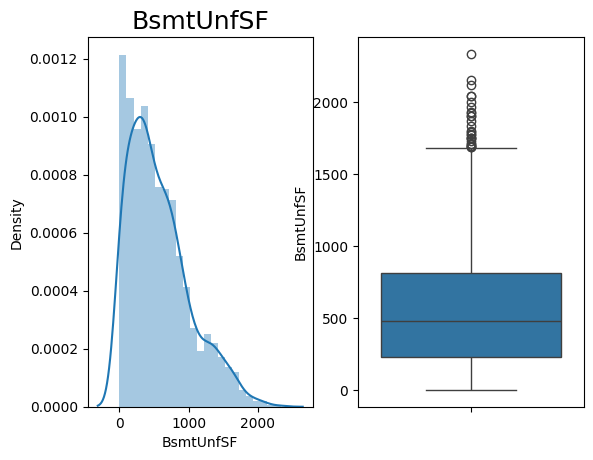

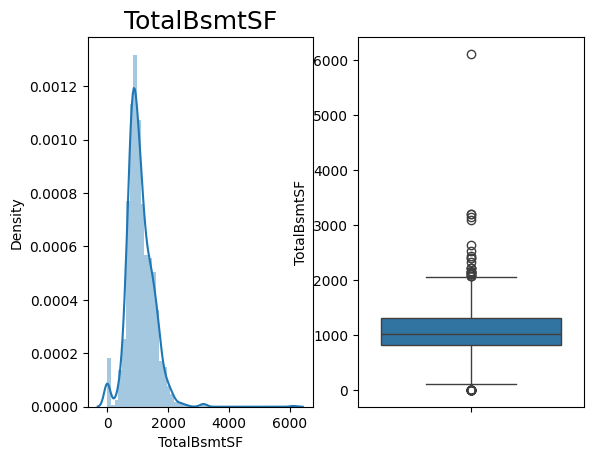

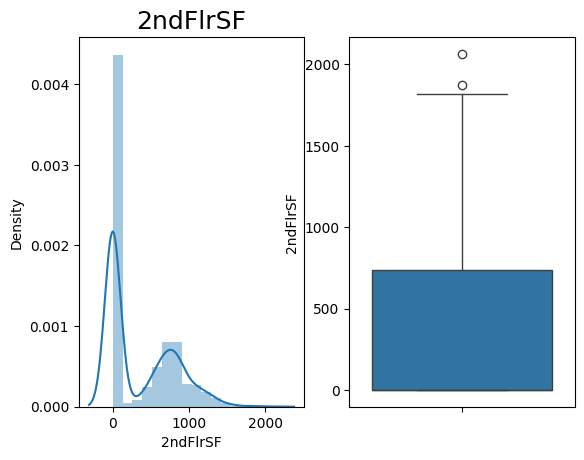

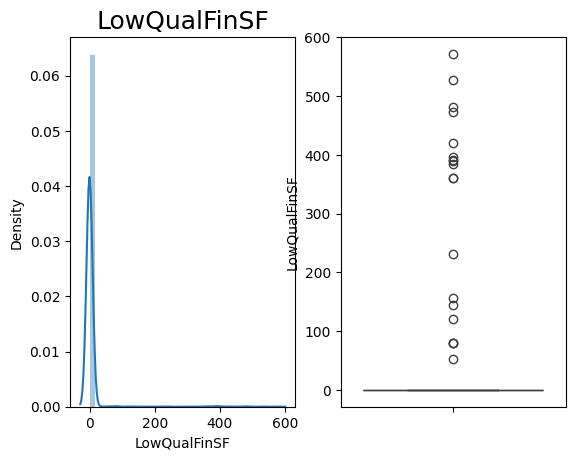

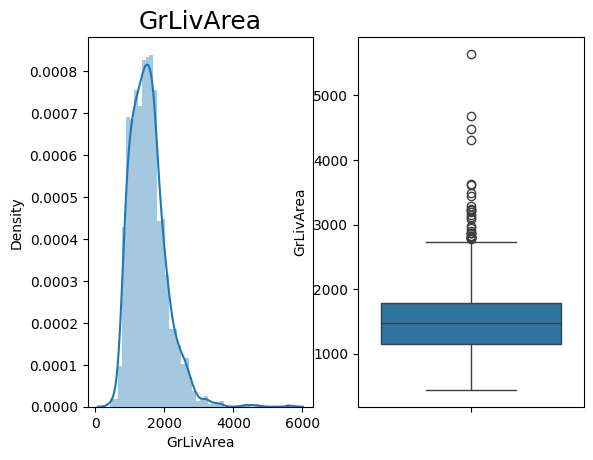

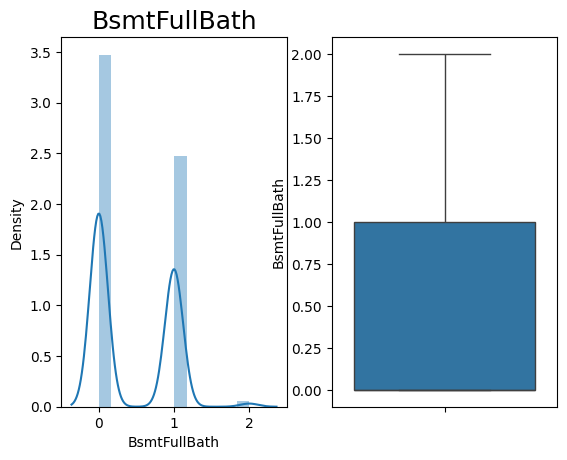

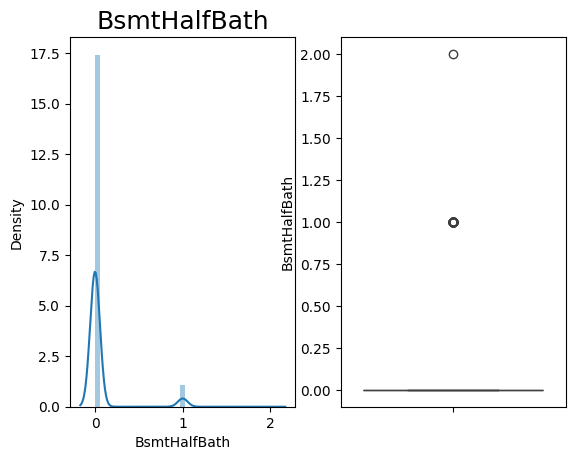

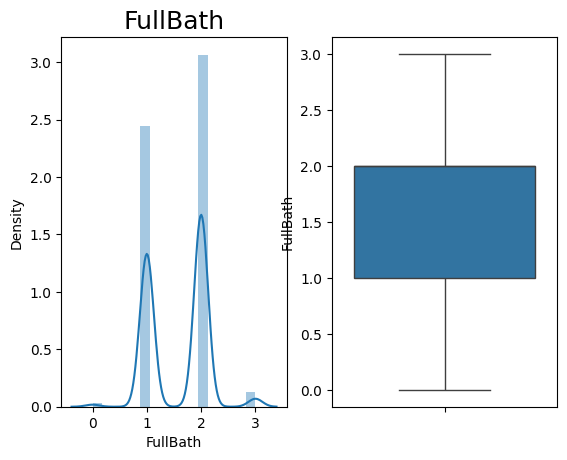

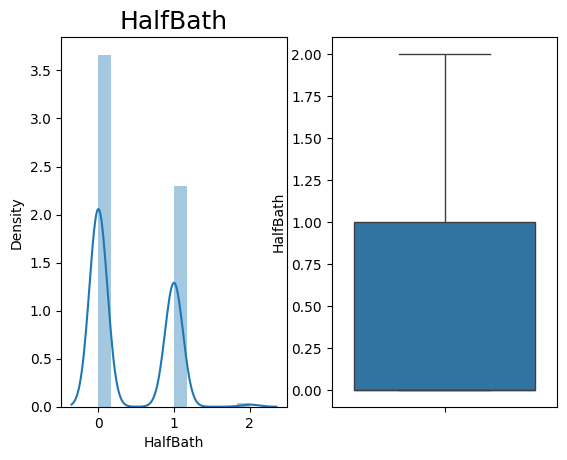

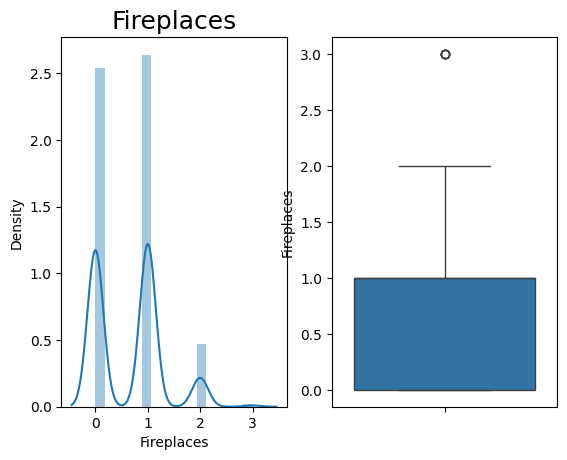

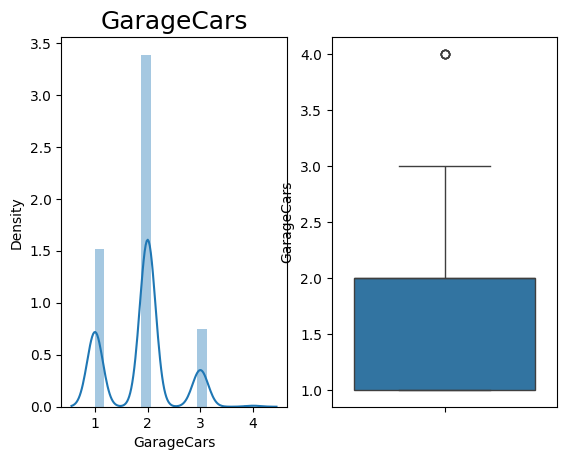

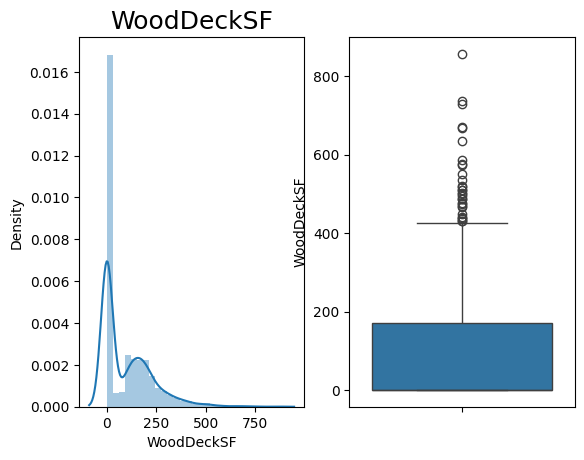

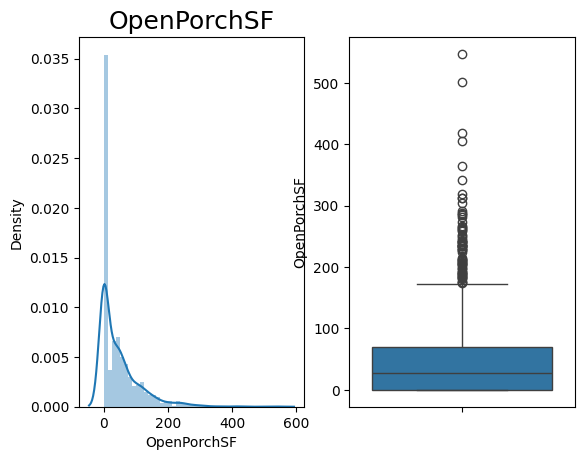

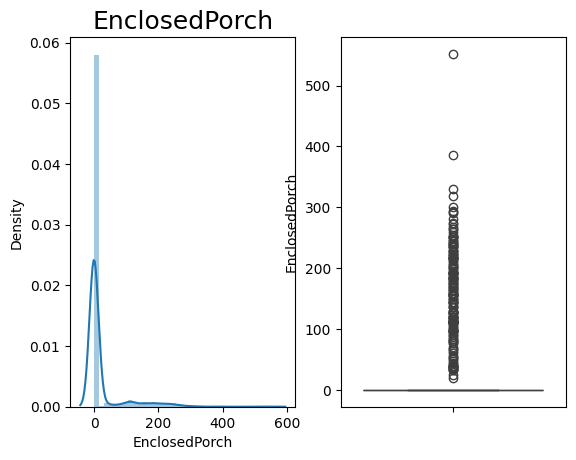

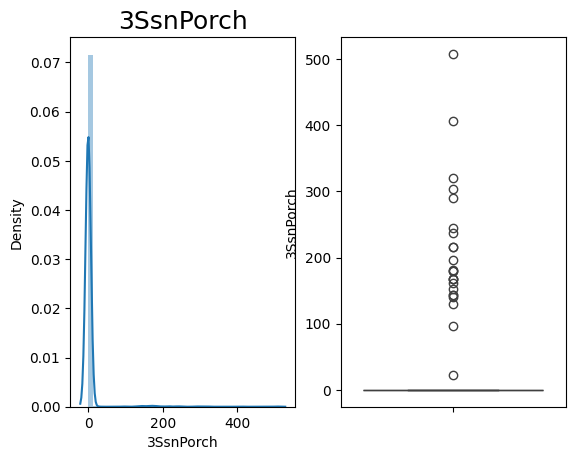

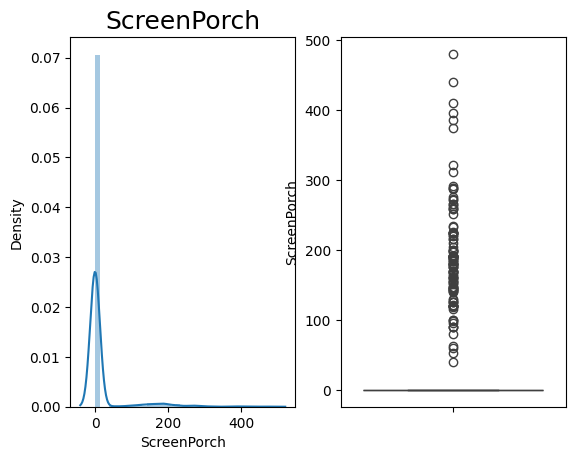

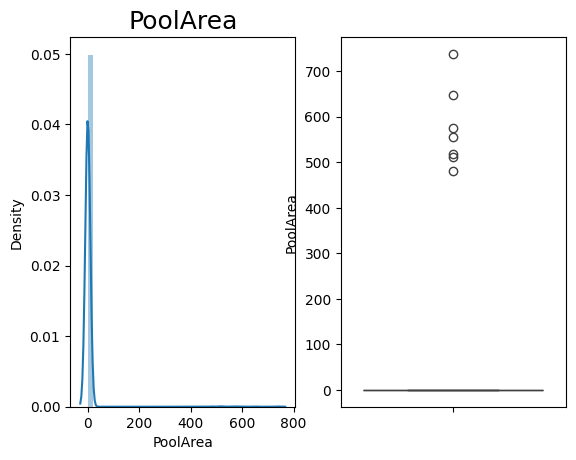

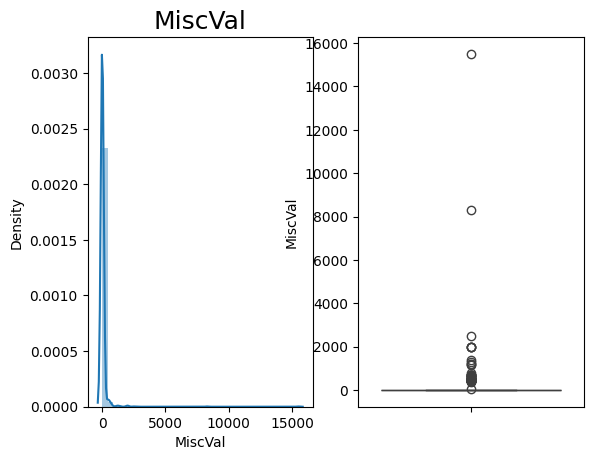

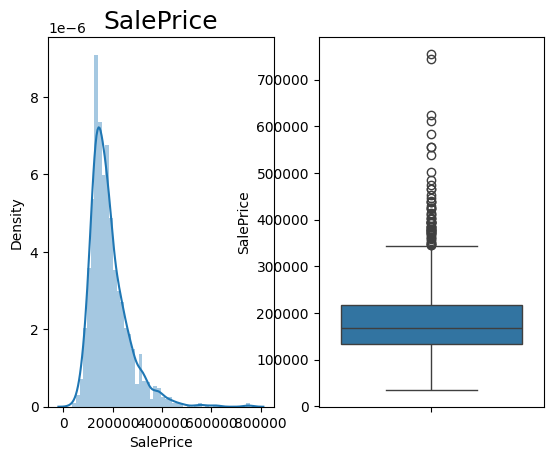

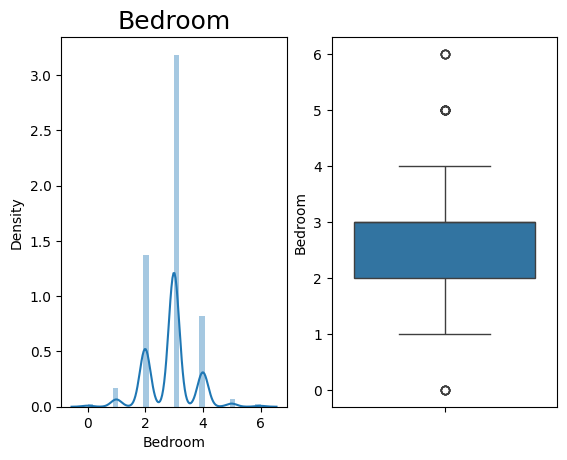

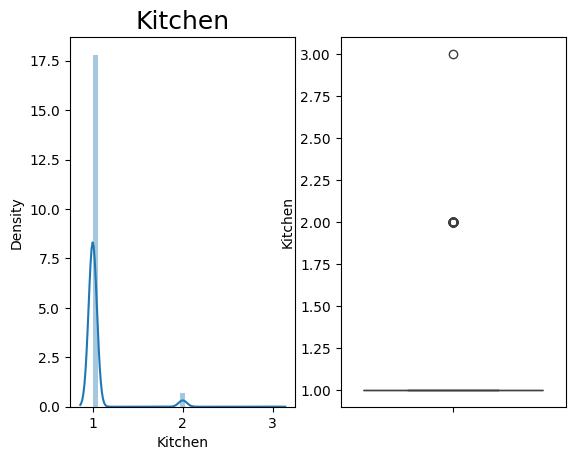

In [14]:
# We remove outliers from numerical variables
# plt.figure(figsize=(17, 40))
count = 1
for field in clean_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.subplot(1,2,1)
    plt.title(field, fontdict={'fontsize': 18})
    sns.distplot(clean_df[field])
    
    plt.subplot(1,2,2)
    sns.boxplot(clean_df[field])
    plt.show()    


<Figure size 4300x10000 with 0 Axes>

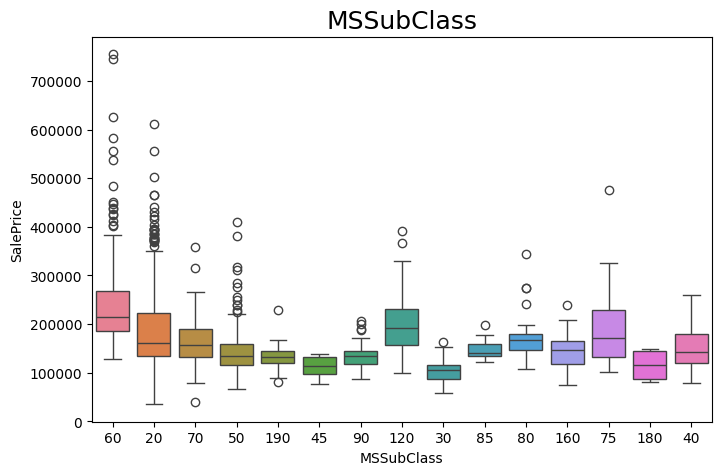

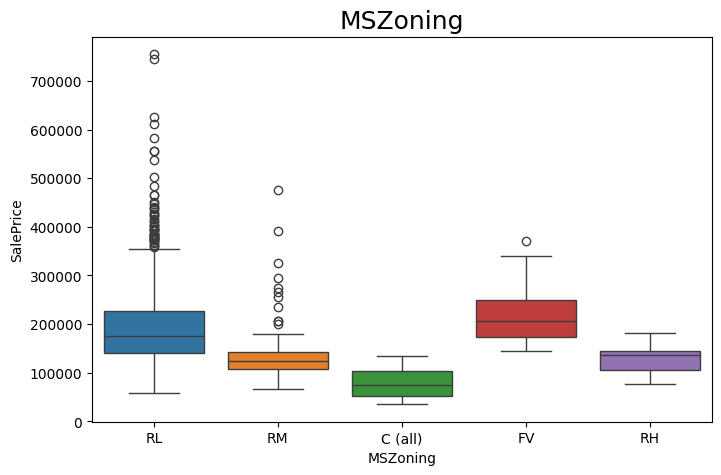

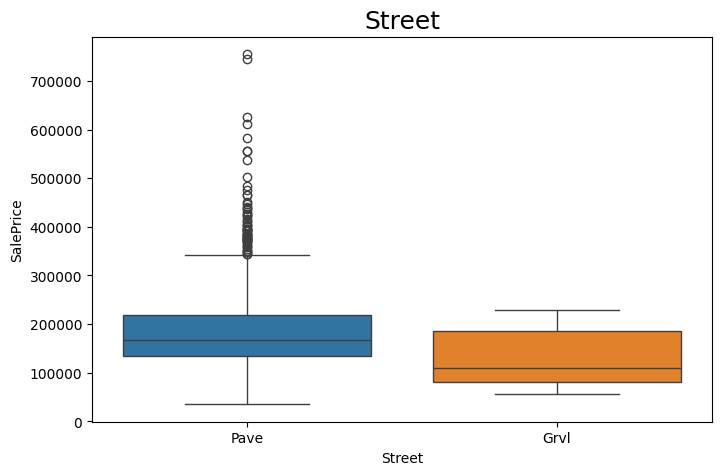

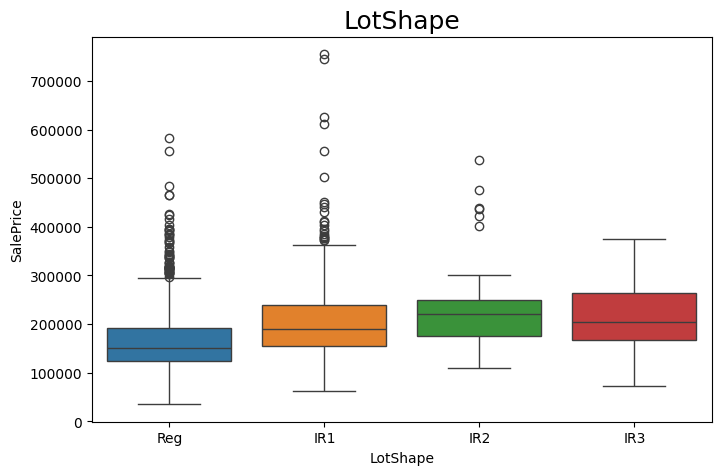

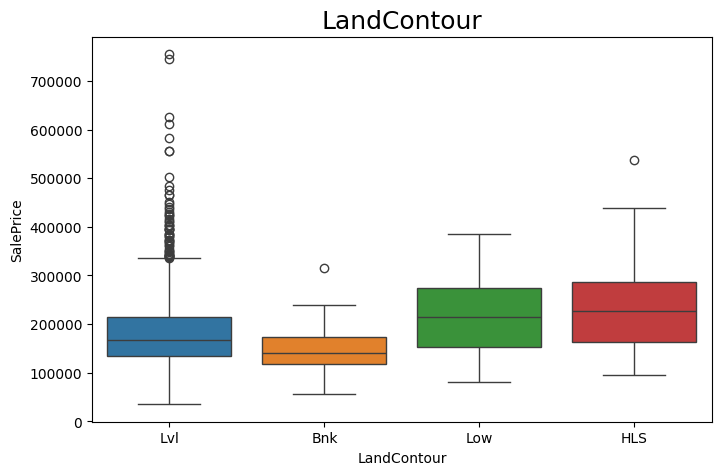

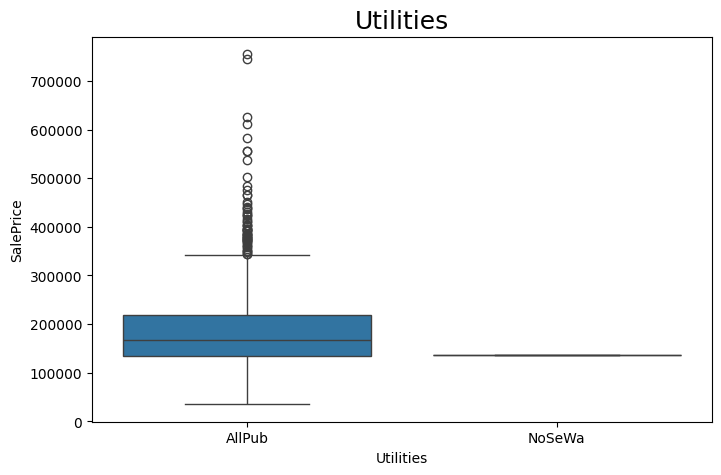

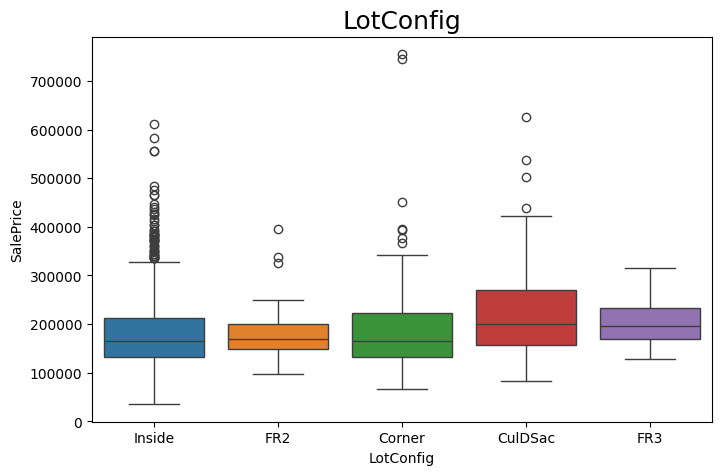

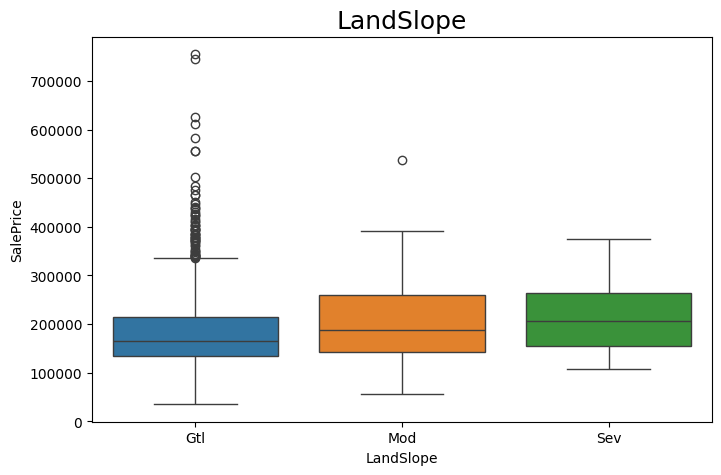

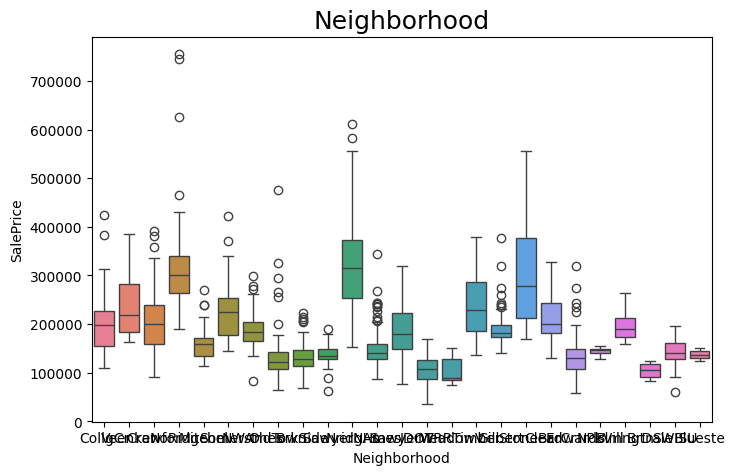

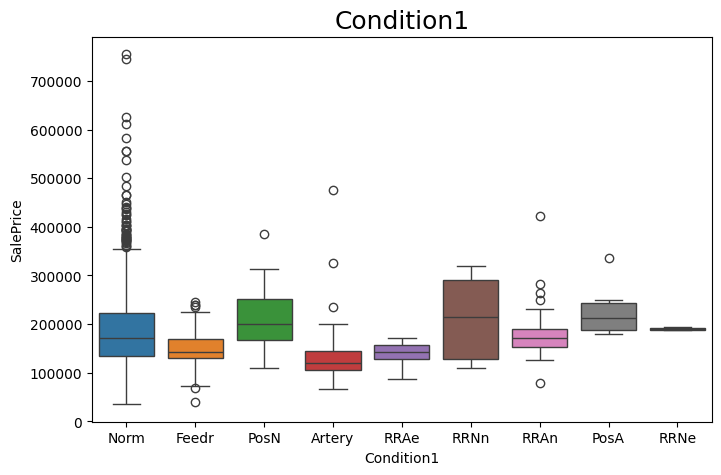

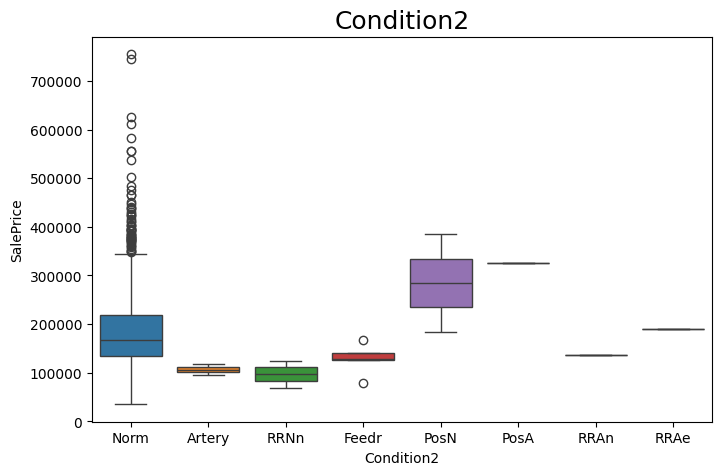

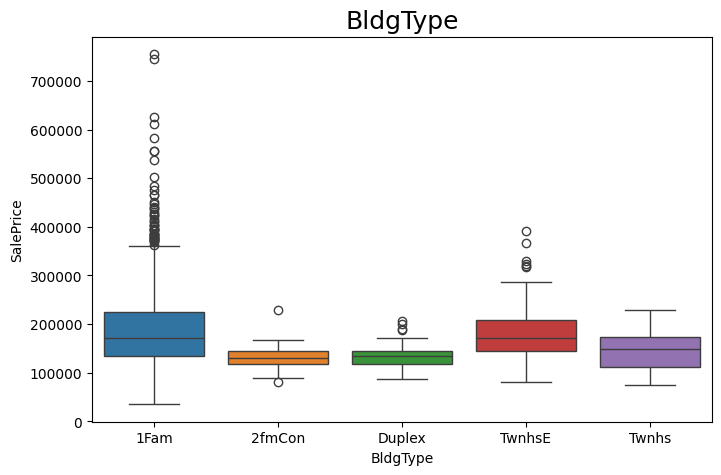

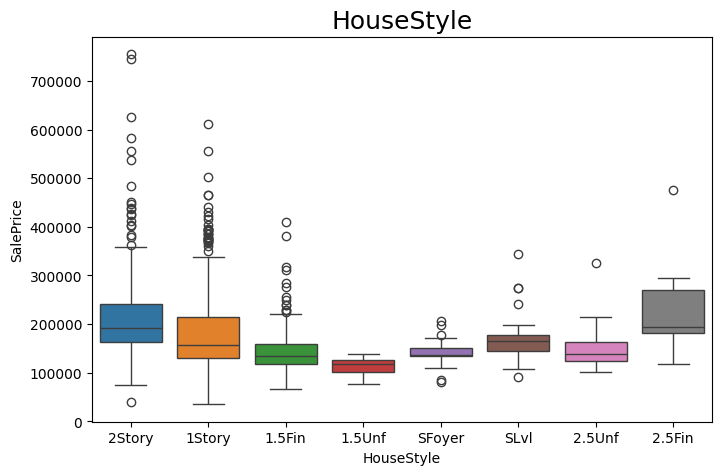

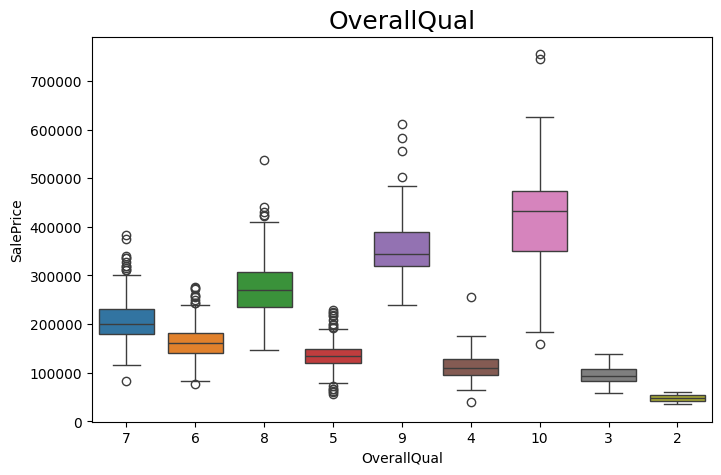

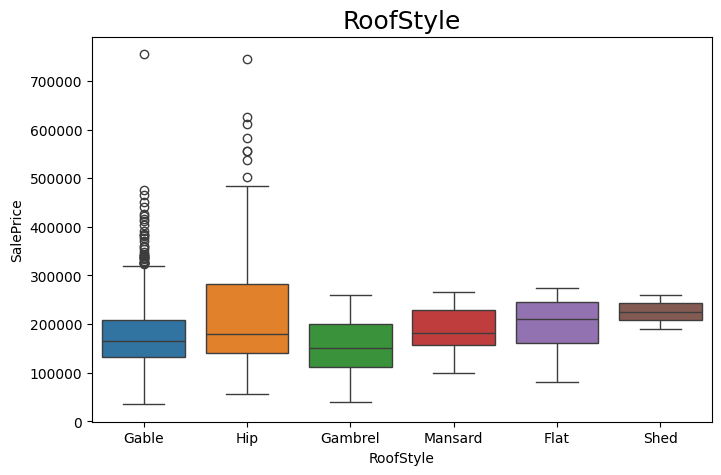

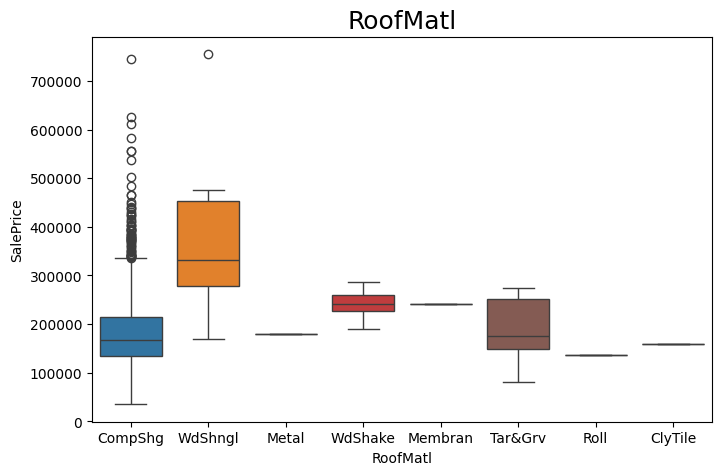

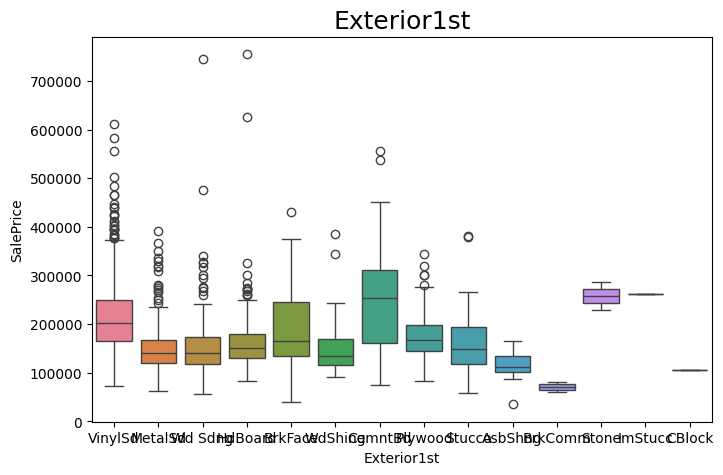

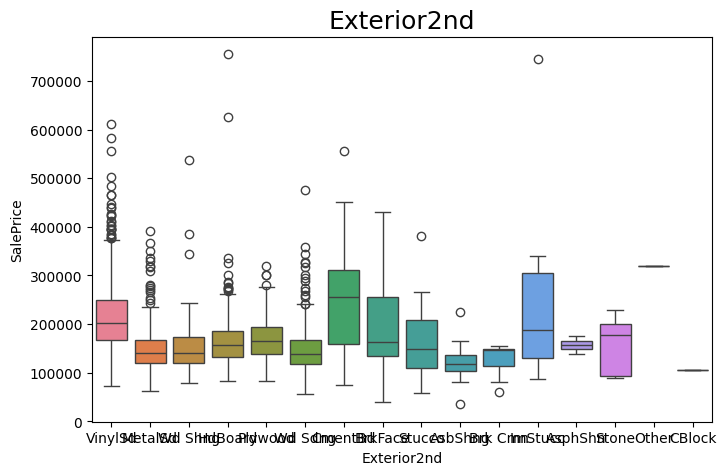

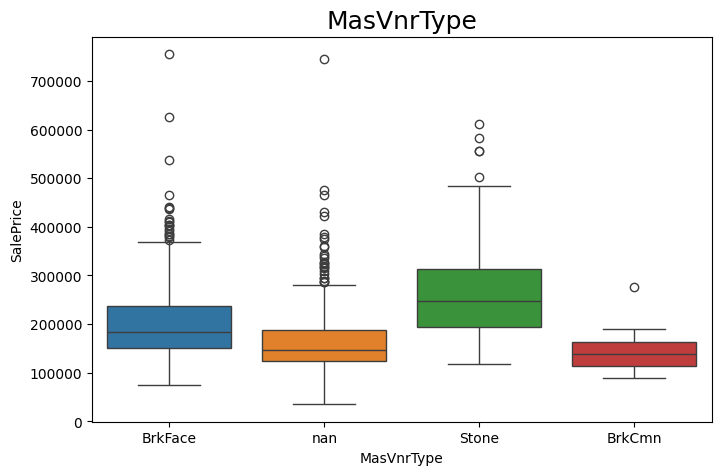

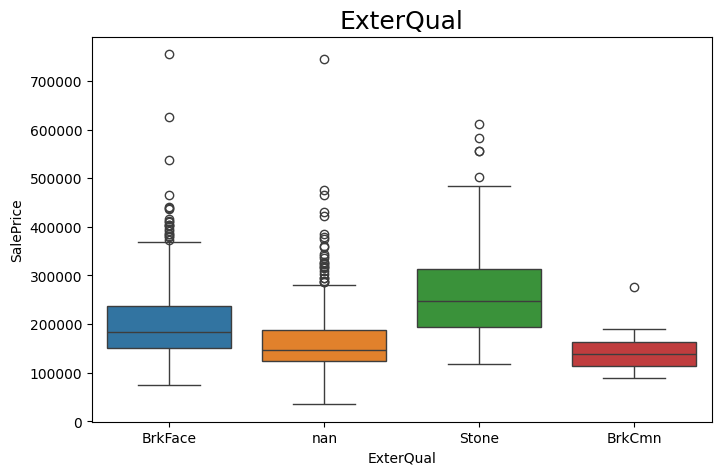

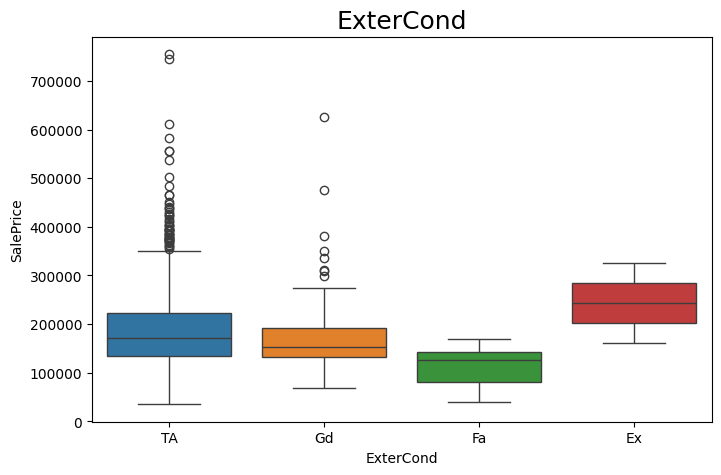

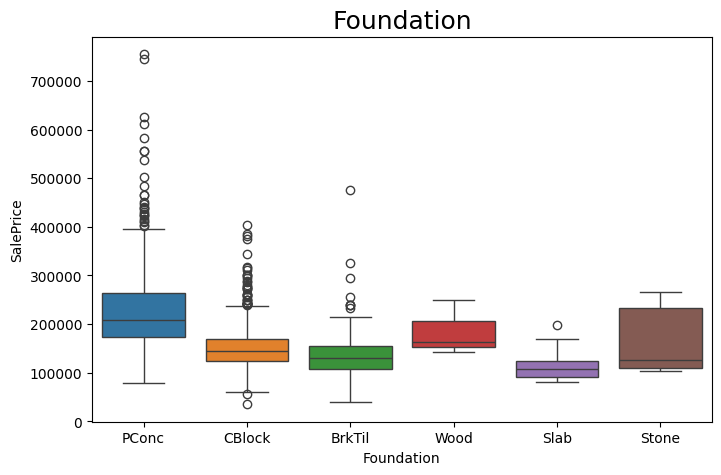

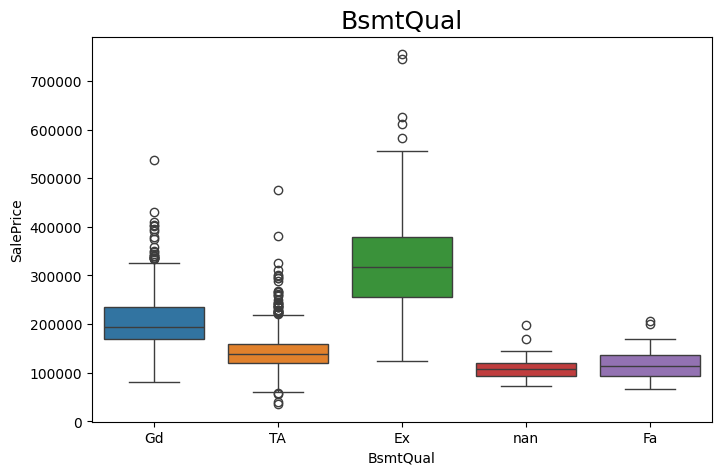

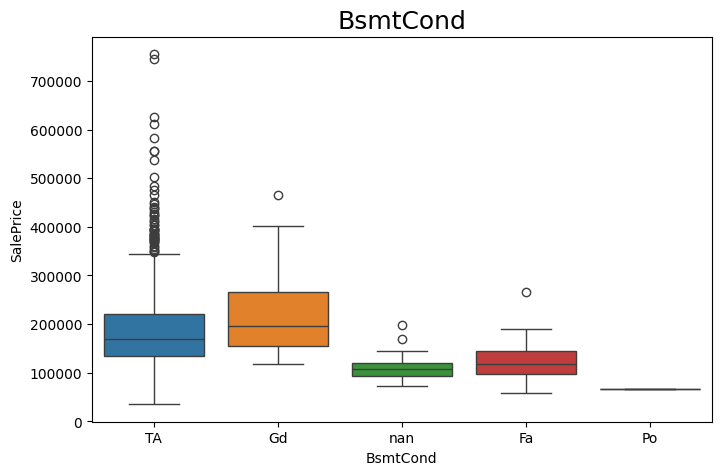

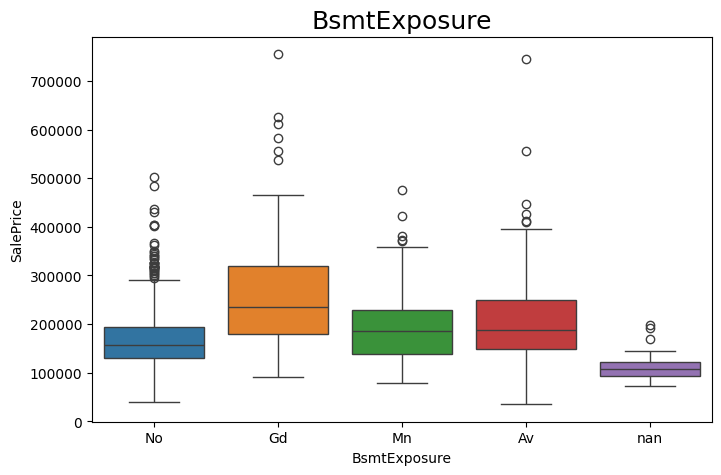

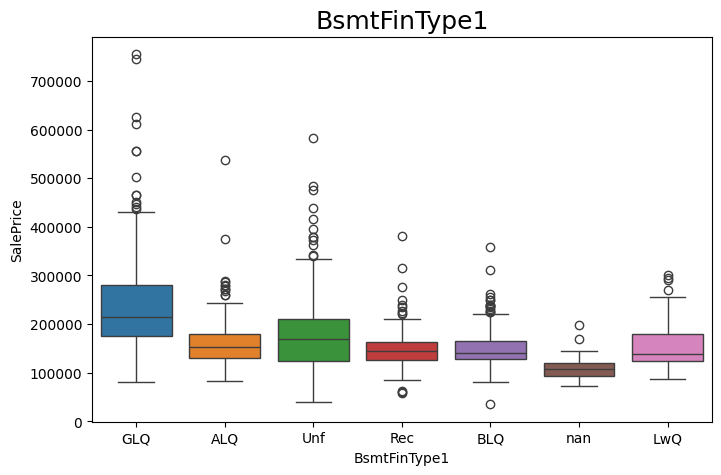

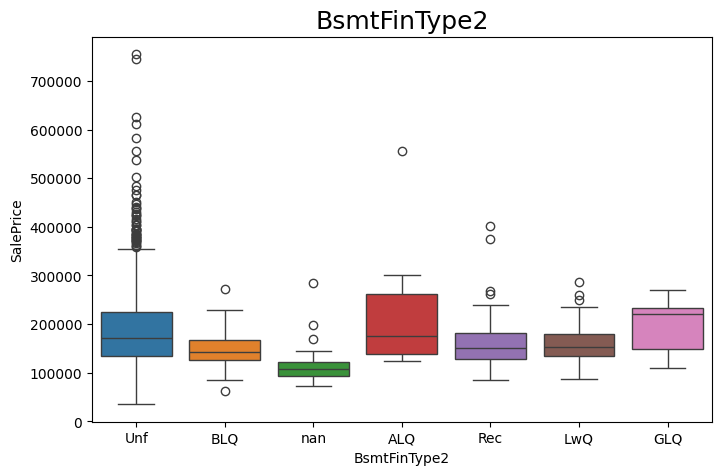

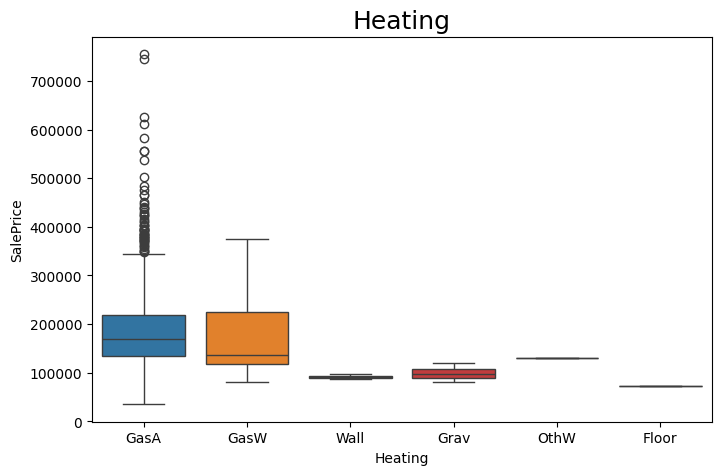

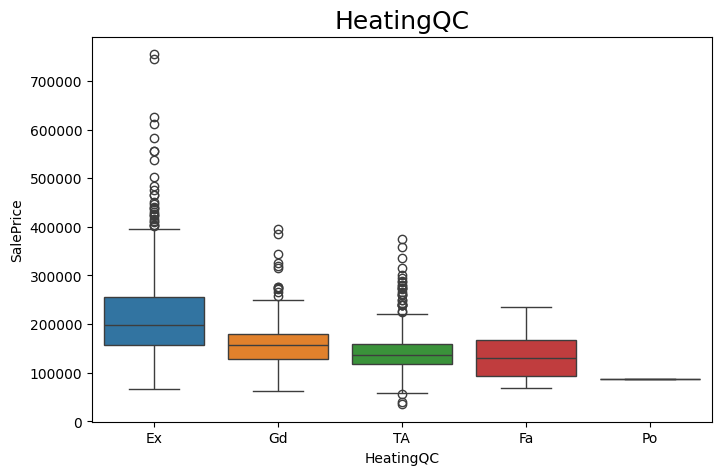

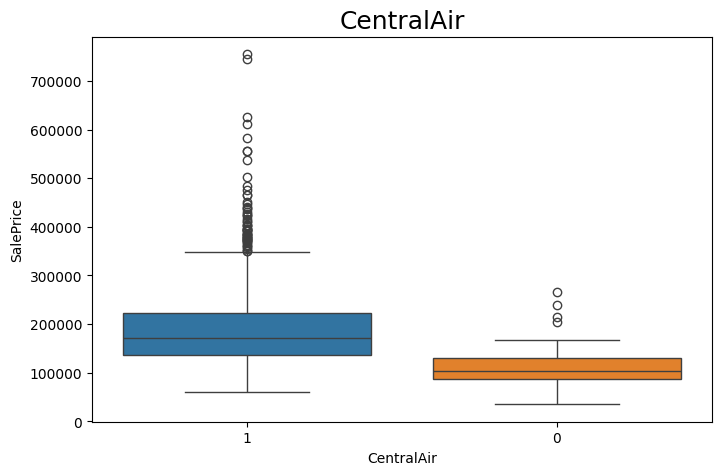

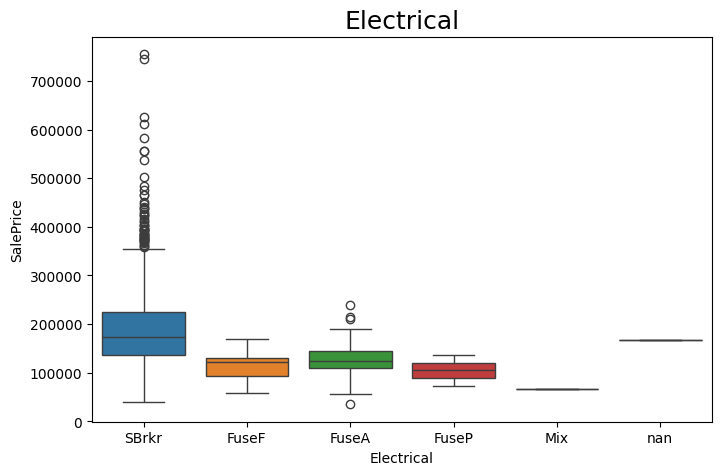

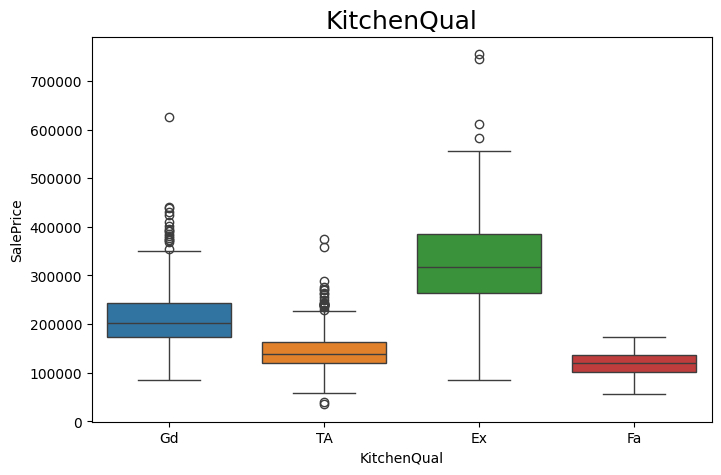

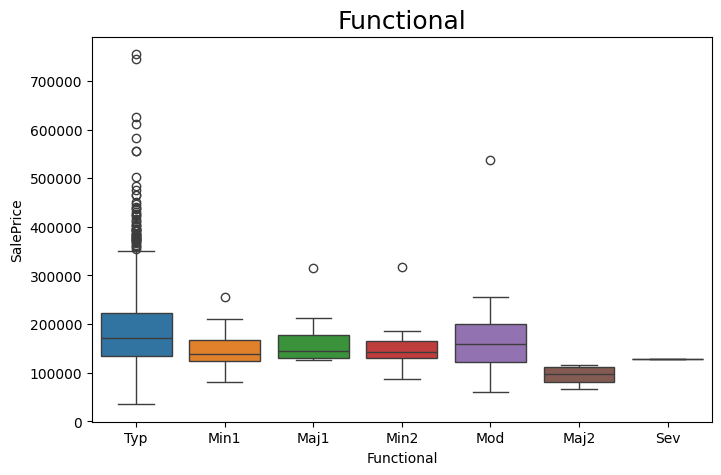

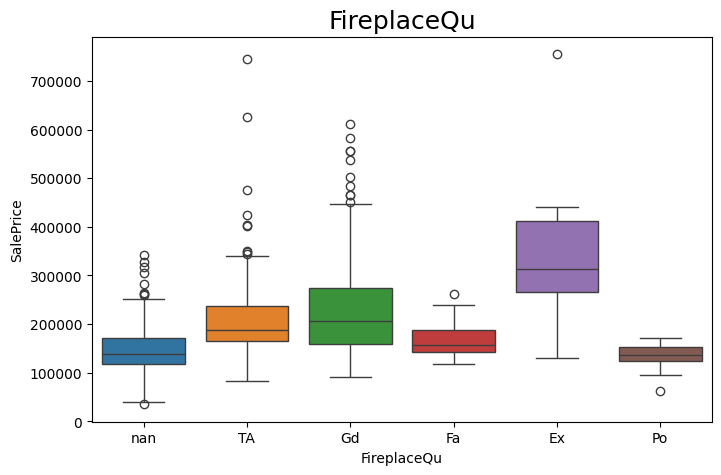

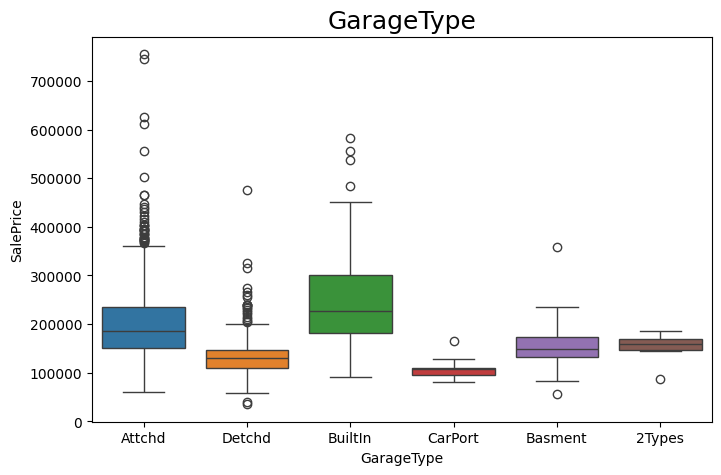

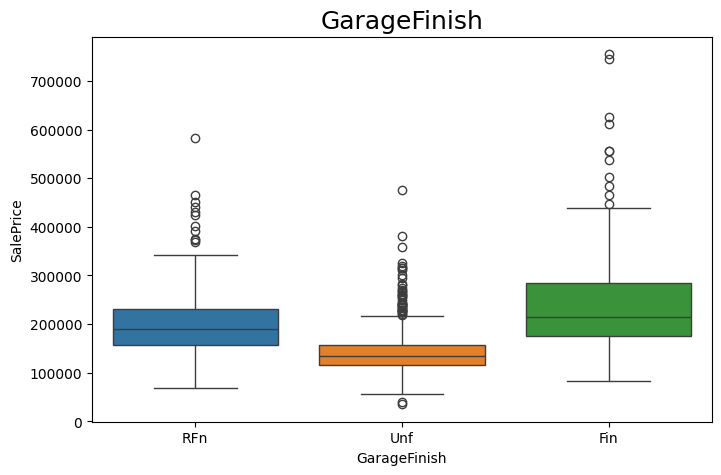

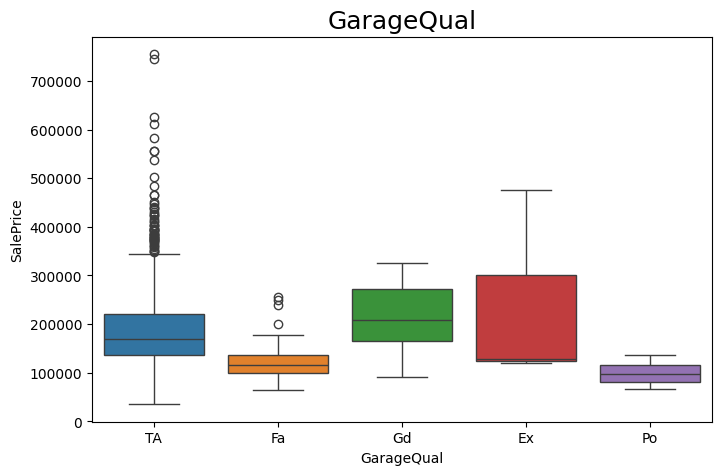

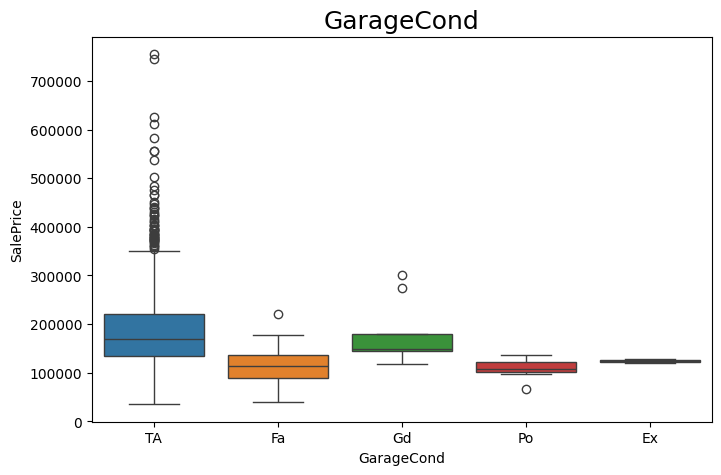

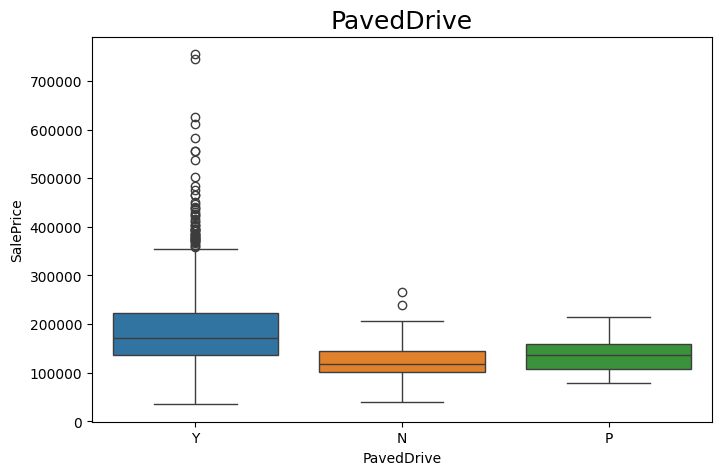

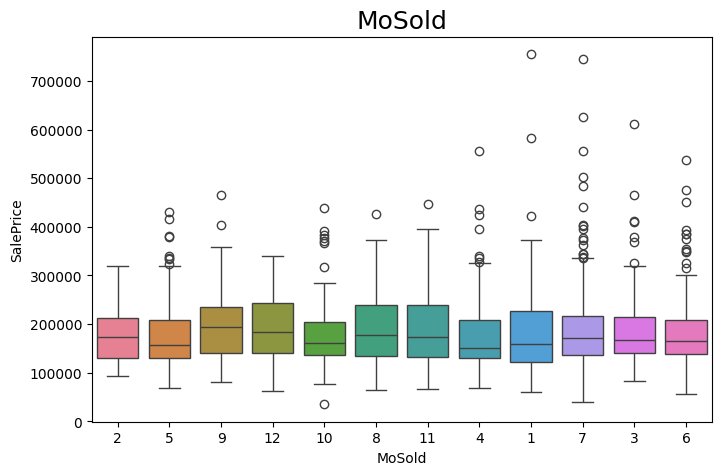

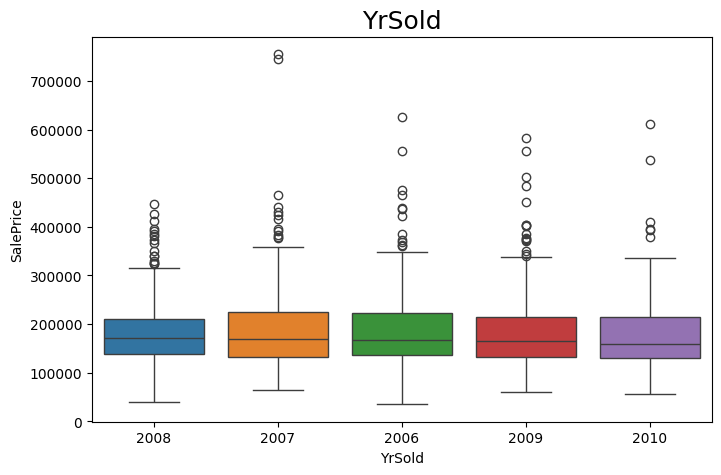

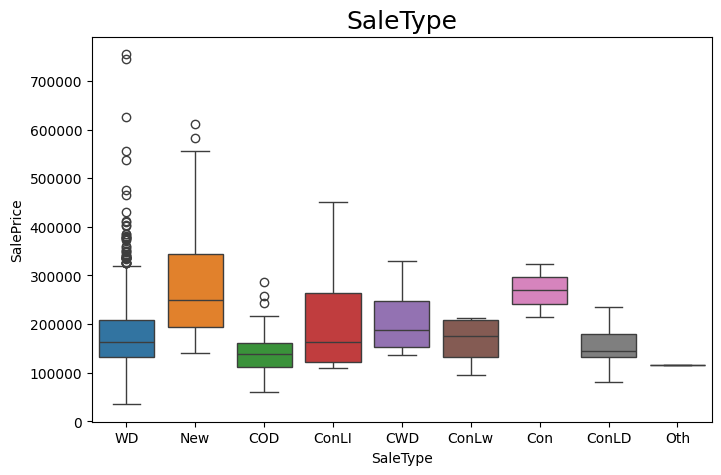

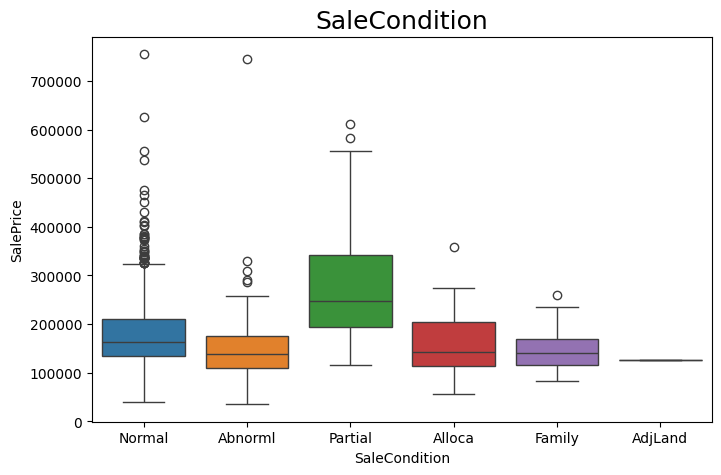

In [15]:
cols = clean_df.select_dtypes(include=['object']).columns

plt.figure(figsize=(len(cols), 100))
for field in cols:
    plt.figure(figsize=(8,5))
    plt.title(field, fontdict={'fontsize': 18})
    sns.boxplot(x = field, y='SalePrice', data = clean_df, hue=field)
    plt.show()

## Data Preparation

In [16]:
# Split X and y for model
y = clean_df["SalePrice"]
X = clean_df.drop("SalePrice", axis=1)

In [17]:
# Create dummy variables for categorical variables

# Convert ca
dummies = pd.get_dummies(categorical_vars, drop_first=True)
dummies.head()

# Drop original categorical variables and keep new dummy variables
X = X.drop(list(categorical_vars.columns), axis=1)

# Replace droped categorical by new dummy variables
X = pd.concat([X, dummies], axis=1)

X.head()

LotFrontage  LotArea  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0   8450.0            5       2003          2003       196.0   
1         80.0   9600.0            8       1976          1976         0.0   
2         68.0  11250.0            5       2001          2002       162.0   
3         60.0   9550.0            5       1915          1970         0.0   
4         84.0  14260.0            5       2000          2000       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0       706.0         0.0      150.0        856.0  ...           False   
1       978.0         0.0      284.0       1262.0  ...           False   
2       486.0         0.0      434.0        920.0  ...           False   
3       216.0         0.0      540.0        756.0  ...           False   
4       655.0         0.0      490.0       1145.0  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 270 columns]

In [18]:
# Scaling all features in X
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

X.head()

LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.253519 -0.219941    -0.534827   1.022885      0.859447    0.475946   
1     0.430634 -0.107317     2.241308   0.103555     -0.461658   -0.588528   
2    -0.116688  0.054274    -0.534827   0.954786      0.810518    0.291293   
3    -0.481570 -0.112214    -0.534827  -1.973449     -0.755236   -0.588528   
4     0.613075  0.349054    -0.534827   0.920737      0.712658    1.312319   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0    0.544957   -0.292833  -0.948701    -0.500778  ...       -0.053936   
1    1.136873   -0.292833  -0.646571     0.429959  ...       -0.053936   
2    0.066202   -0.292833  -0.308365    -0.354060  ...       -0.053936   
3   -0.521362   -0.292833  -0.069366    -0.730023  ...       -0.053936   
4    0.433973   -0.292833  -0.182101     0.161742  ...       -0.053936   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0       -0.053936     -0.308729     -0.026939     0.393626   
1       -0.053936     -0.308729     -0.026939     0.393626   
2       -0.053936     -0.308729     -0.026939     0.393626   
3       -0.053936     -0.308729     -0.026939     0.393626   
4       -0.053936     -0.308729     -0.026939     0.393626   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0              -0.026939             -0.089671             -0.121312   
1              -0.026939             -0.089671             -0.121312   
2              -0.026939             -0.089671             -0.121312   
3              -0.026939             -0.089671             -0.121312   
4              -0.026939             -0.089671             -0.121312   

   SaleCondition_Normal  SaleCondition_Partial  
0              0.461347              -0.312938  
1              0.461347              -0.312938  
2              0.461347              -0.312938  
3             -2.167567              -0.312938  
4              0.461347              -0.312938  

[5 rows x 270 columns]

### Detect and Remove Multicollinearity

In [19]:
# Train - Test dataset split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
)

## Model Building and Evaluation


In [20]:
def evaluate_model(
        y_train: pd.DataFrame, 
        y_test: pd.DataFrame, 
        y_pred_train: pd.DataFrame, 
        y_pred_test: pd.DataFrame) -> dict:
    """
    Calculate and return evaluation result for a specific model
    """

    plt.yscale('log')
    plt.xscale('log')


    plt.scatter(y_train, y_pred_train, c='crimson')
    p1 = max(max(y_pred_train), max(y_train))
    p2 = min(min(y_pred_train), min(y_train))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Actual Train Values', fontsize=15)
    plt.ylabel('Predictions on Train', fontsize=15)
    plt.axis('equal')   
    plt.show() 

    plt.scatter(y_test, y_pred_test, c='#88c999')
    p1 = max(max(y_pred_test), max(y_test))
    p2 = min(min(y_pred_test), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Actual Test Values', fontsize=15)
    plt.ylabel('Predictions on Test', fontsize=15)
    plt.axis('equal')   
    plt.show()
   

    plt.show()
    return dict(
         # Calcuate R2
        r2_train = float(r2_score(y_train, y_pred_train)),
        r2_test = float(r2_score(y_test, y_pred_test)),

        # Calculate RSS
        rss_train = float(np.sum(np.square(y_train - y_pred_train))),
        rss_test = float(np.sum(np.square(y_test - y_pred_test))),

        # Calculate MSE
        mse_train = float(mean_squared_error(y_train, y_pred_train)),
        mse_test = float(mean_squared_error(y_test, y_pred_test))
    )


def get_grid_search(estimator, X_train, y_train):
    
    params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]
        }
    folds = 5
    
    cv = GridSearchCV(
        estimator=estimator, 
        param_grid=params,
        scoring='neg_mean_absolute_error',  
        cv=folds,
        return_train_score=True,
        verbose=0,
        n_jobs=-1
    )
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        cv.fit(X_train, y_train)

    cv_result = pd.DataFrame(cv.cv_results_)
    cv_result = cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by="param_alpha")


    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'], label='Train')
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'], label='Test')
    plt.xlabel('alpha')
    plt.ylabel('R2_score')
    plt.xscale('log')
    plt.legend()
    plt.show()

    return cv

# Use Lasso result to select features
def select_feature(columns: list, coef: list, nums: int) -> pd.DataFrame:

    features = {'field': columns, 'value': coef}

    features_df = pd.DataFrame(features)
    features_df = features_df[(features_df["value"] != 0) & (features_df["value"] != -0)]
    features_df.sort_values(by='value', ascending=False, inplace=True)

    features_df['abs_coef'] = features_df['value'].apply(abs)
    features_df.sort_values(by='abs_coef', ascending=False, inplace=True)


    features_df = features_df.iloc[0:nums, :]

    f, axe = plt.subplots(1,1, figsize=(20,5))
    ax = sns.barplot(data=features_df, x='field', y='value', ax=axe)
    ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
    for i in ax.containers:
        ax.bar_label(i,)   

    return features_df           

### Train with Linear Regression

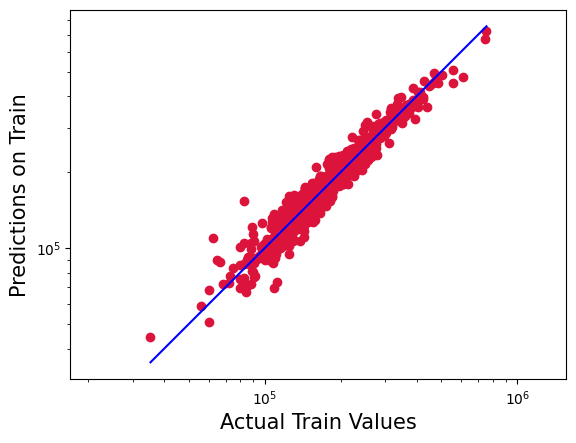

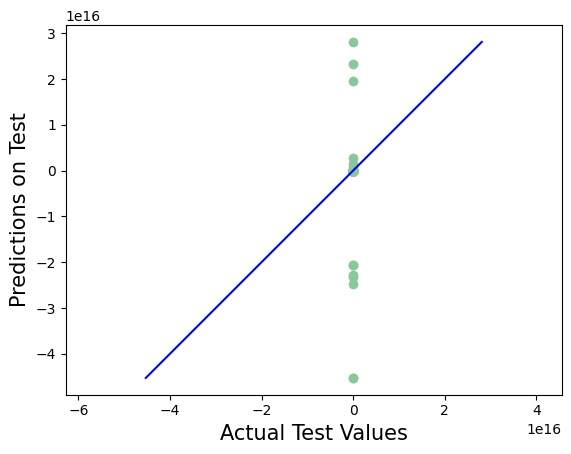

{'mse_test': 2.0186529154705e+31,
 'mse_train': 277853695.01487994,
 'r2_test': -3.3975825911529194e+21,
 'r2_train': 0.9563701831555385,
 'rss_test': 8.35722307004787e+33,
 'rss_train': 268128815689.35913}


In [21]:
# Do train and prediction
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred_train = lr.predict(X_train)
lr_y_pred_test = lr.predict(X_test)

lr_metrics = evaluate_model(y_train, y_test, lr_y_pred_train, lr_y_pred_test)

pprint(lr_metrics)

### Conclusion
Linear regression have the good outcome in train model but had a bad outcome in testing.
It means this is not a linear regression and we should consider the case of polynomial regression or applying regulazation

### Train with Ridge Regression

`Loss Function = RSS + α * (sum of the square of coefficients)`

- Here, α (alpha) is the parameter that balances the amount of emphasis given to minimizing RSS vs minimizing the sum of squares of coefficients.

- α can take various values:

  - α = 0: 
    - The objective becomes the same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
  - α = ∞: 
    - The coefficients will be zero. Because of infinite weightage on the square of coefficients, anything less than zero will make the objective infinite.
  - 0 < α < ∞: 
    - The magnitude of α will decide the weightage given to different parts of the objective.
    - The coefficients will be somewhere between 0 and ones for simple linear regression.


- Process
  1. I will apply training manually to find the best alpha for model
  2. I wil use GridSearchCV to find out the best value of alpha


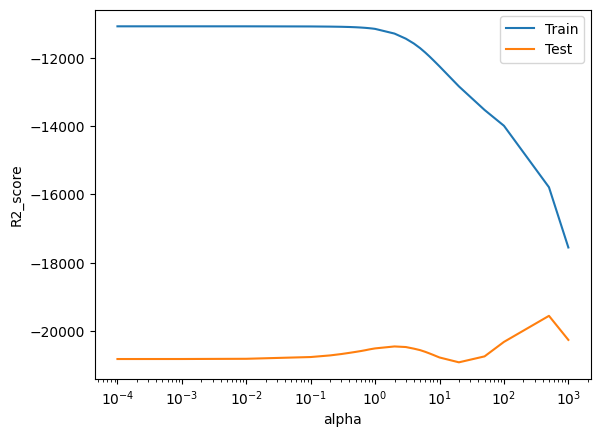

param_alpha  mean_train_score  mean_test_score  rank_test_score
25         500     -15790.479603    -19550.641545                1
26        1000     -17551.668085    -20253.919832                2
24         100     -13992.476538    -20312.842990                3
13         2.0     -11296.824540    -20445.546461                4
14         3.0     -11446.007940    -20462.808394                5
12         1.0     -11159.553585    -20502.590871                6
15         4.0     -11588.398368    -20510.252778                7
11         0.9     -11148.442213    -20517.210937                8
10         0.8     -11138.215216    -20534.545209                9
16         5.0     -11722.970131    -20553.613247               10
9          0.7     -11128.827680    -20557.006362               11
8          0.6     -11119.969338    -20580.076807               12
17         6.0     -11850.942849    -20602.805162               13
7          0.5     -11111.700237    -20604.401297               14
6          0.4     -11104.517477    -20632.633265               15
18         7.0     -11967.437912    -20650.557546               16
5          0.3     -11098.281853    -20667.156978               17
19         8.0     -12073.923073    -20693.584633               18
4          0.2     -11093.154261    -20707.819545               19
20         9.0     -12169.745042    -20733.473289               20
23          50     -13529.837420    -20736.183703               21
3          0.1     -11088.397541    -20755.188654               22
21        10.0     -12256.055751    -20768.216265               23
2         0.01     -11084.848710    -20806.487061               24
1        0.001     -11084.596718    -20812.900989               25
0       0.0001     -11084.574422    -20813.546855               26
22          20     -12841.131927    -20909.823976               27

In [22]:
# Get the best alpha
ridge_cv = get_grid_search(Ridge(), X_train, y_train)
ridge_cv_result = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by="rank_test_score")



### Create a Ridge Regression model with the best alpha

Train model with the best Ridge alpha 500


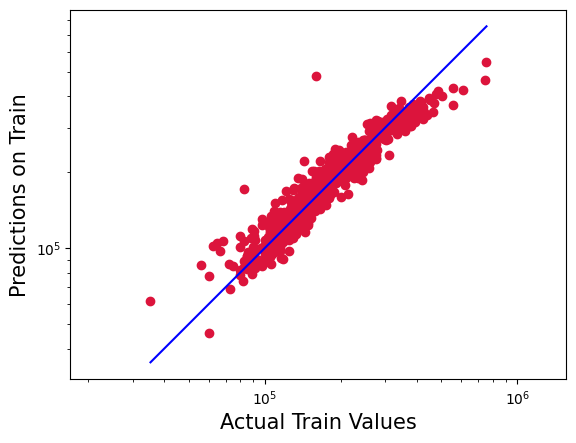

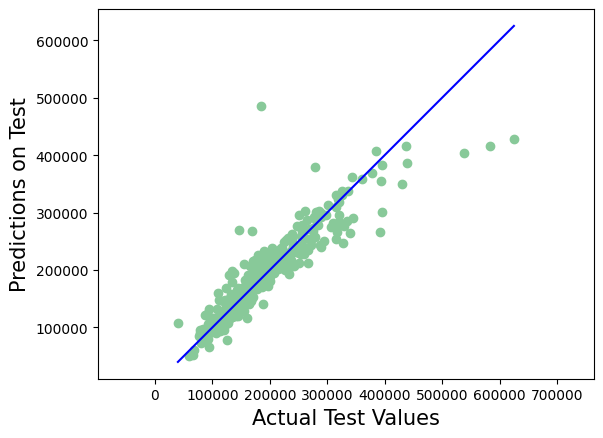

In [23]:
def run_ridge(
        alpha: int, 
        X_train: pd.DataFrame, 
        y_train: pd.DataFrame, 
        X_test: pd.DataFrame, 
        y_test: pd.DataFrame
        ) -> tuple:

    # Do train
    print(f"Train model with the best Ridge alpha {alpha}")

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Do test
    ridge_y_pred_train = ridge.predict(X_train)
    ridge_y_pred_test = ridge.predict(X_test)

    # Do evaluate
    ridge_metrics = evaluate_model(y_train, y_test, ridge_y_pred_train, ridge_y_pred_test)


    return ridge, ridge_metrics

ridge, ridge_metrics = run_ridge(
    ridge_cv.best_params_["alpha"],
    X_train,
    y_train,
    X_test,
    y_test
    )

## Show Ridge Peformance

Evaluation metrics
r2_train = 0.88
r2_test = 0.83
rss_train = 732646530461.32
rss_test = 417891115771.33
mse_train = 759219202.55
mse_test = 1009398830.37
Intercept
185862.89658121121


field         value      abs_coef
12              GrLivArea  10516.182577  10516.182577
129      RoofMatl_WdShngl   7286.124796   7286.124796
18             GarageCars   7201.395464   7201.395464
117         OverallQual_9   6701.646810   6701.646810
74   Neighborhood_NoRidge   5818.194010   5818.194010

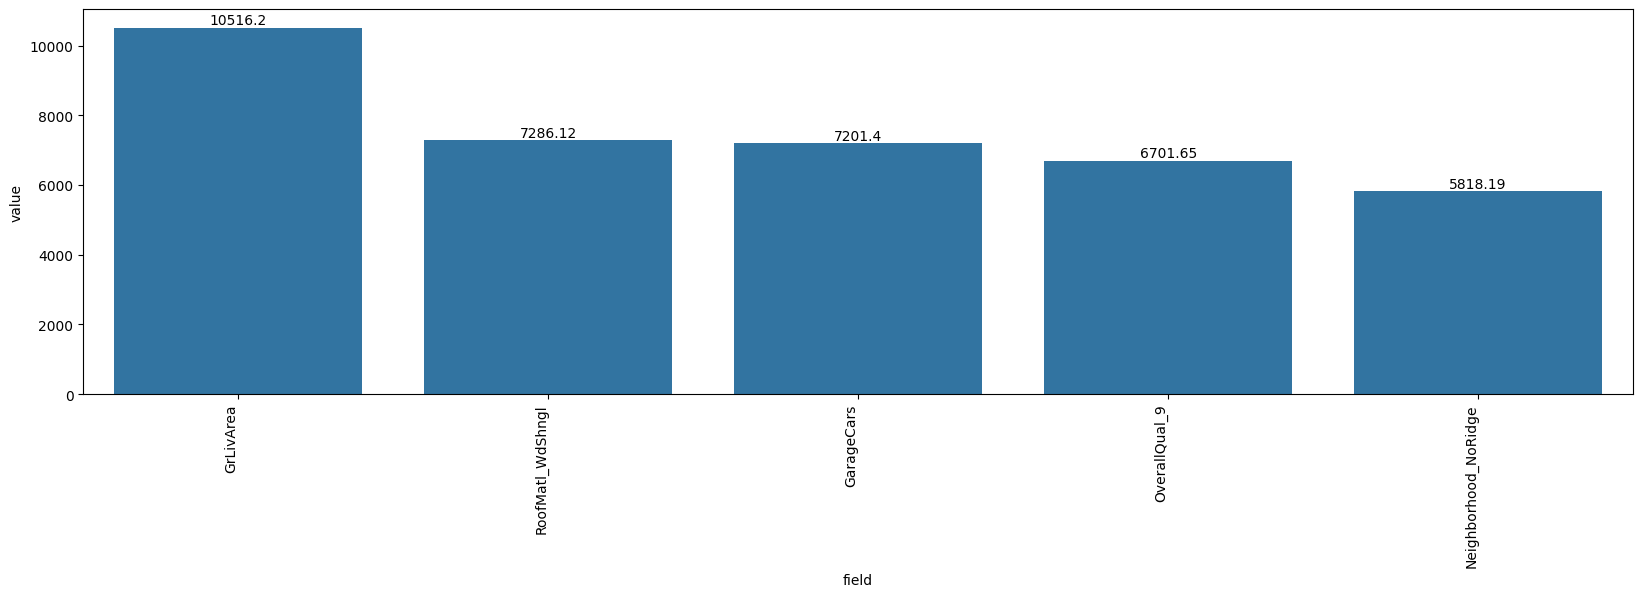

In [24]:
ridge_intercept = ridge.intercept_
ridge_coef = ridge.coef_

print("Evaluation metrics")
for k, v in ridge_metrics.items():
    print(f"{k} = {round(v, 2)}")

print("Intercept")
pprint(ridge_intercept)

ridge_features = select_feature(X.columns.to_list(), ridge.coef_.tolist(), 5)
ridge_features

### Train with Lasso Regression

`Loss Function = RSS + α * (sum of the absolute value of coefficients)`

- Here, α (alpha) works similar to that of the ridge and provides a trade-off between balancing RSS and the magnitude of coefficients. Like that of the Ridge.
- α can take various values:

  - α = 0: 
    - Same coefficients as simple linear regression 
  - α = ∞: 
    - All coefficients zero. Because of infinite weightage on the square of coefficients, anything less than zero will make the objective infinite.
  - 0 < α < ∞: 
    - coefficients between 0 and that of simple linear regression

/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e+10, tolerance: 4.916e+08
  model = cd_fast.enet_coordinate_descent(
/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.742e+10, tolerance: 4.880e+08
  model = cd_fast.enet_coordinate_descent(
/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

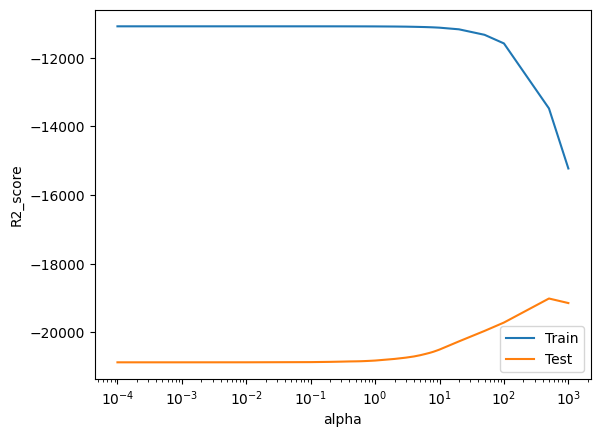

param_alpha  mean_train_score  mean_test_score  rank_test_score
25         500     -13477.937996    -19012.661145                1
26        1000     -15226.447086    -19145.270700                2
24         100     -11584.985766    -19712.596314                3
23          50     -11333.950328    -19956.183062                4
22          20     -11173.909780    -20261.486910                5
21        10.0     -11126.270703    -20499.098435                6
20         9.0     -11121.642508    -20530.704520                7
19         8.0     -11117.067307    -20564.105632                8
18         7.0     -11112.812552    -20596.398896                9
17         6.0     -11108.626682    -20628.367684               10
16         5.0     -11104.880889    -20664.261333               11
15         4.0     -11100.749031    -20700.250313               12
14         3.0     -11096.337749    -20734.502697               13
13         2.0     -11092.845371    -20771.956000               14
12         1.0     -11089.549746    -20819.418366               15
11         0.9     -11089.247506    -20824.189028               16
10         0.8     -11088.933640    -20829.058885               17
9          0.7     -11088.638885    -20834.113419               18
8          0.6     -11088.343043    -20839.239342               19
7          0.5     -11088.082218    -20842.368748               20
6          0.4     -11087.773631    -20845.134134               21
5          0.3     -11087.472285    -20850.669071               22
4          0.2     -11087.196270    -20857.414352               23
3          0.1     -11086.959389    -20864.829114               24
2         0.01     -11086.790917    -20869.948120               25
1        0.001     -11086.784867    -20870.742528               26
0       0.0001     -11086.784786    -20870.822848               27

In [25]:
# We run GridsearchCV to get the best alpha
lasso_cv = get_grid_search(Lasso(), X_train, y_train)

# Ranking the alpha performance
lasso_cv_result = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by="rank_test_score")

The best Lasso Alpha: 500


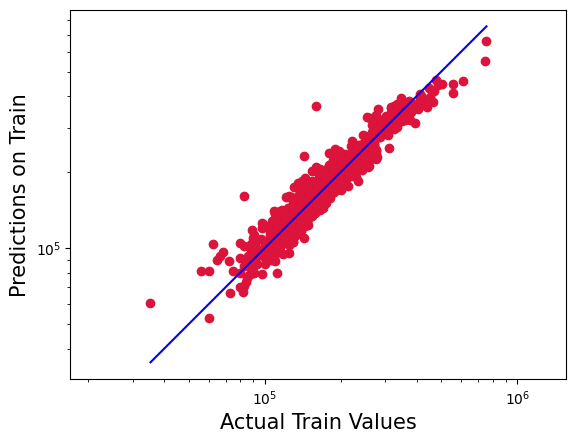

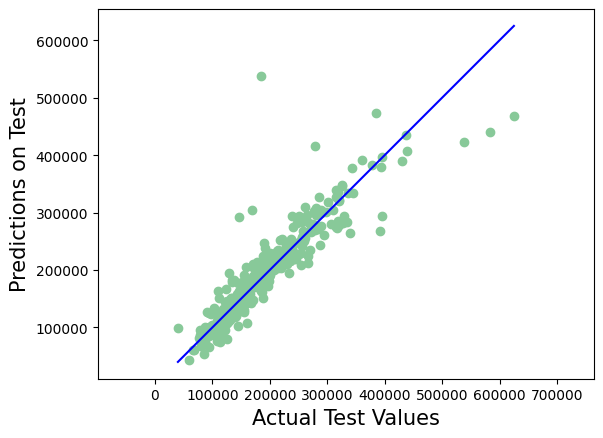

In [26]:
# Do train

def run_lasso(
        alpha: int,
        X_train,
        y_train,
        X_test,
        y_test
) -> tuple:
    """
    Train a model with Lasso Regression
    Return model and evaluation metrics
    """

    print(f"The best Lasso Alpha: {alpha}")


    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Do test
    lasso_y_pred_train = lasso.predict(X_train)
    lasso_y_pred_test = lasso.predict(X_test)

    # Do evaluate
    lasso_metrics = evaluate_model(y_train, y_test, lasso_y_pred_train, lasso_y_pred_test)

    return lasso, lasso_metrics


lasso, lasso_metrics = run_lasso(
    lasso_cv.best_params_["alpha"],
    X_train,
    y_train,
    X_test,
    y_test
)

## Show Lasso Performance

Evaluation metrics
r2_train = 0.9249118984897965
r2_test = 0.825314775071899
rss_train = 461456984842.90063
rss_test = 429682973878.85944
mse_train = 478193766.67658097
mse_test = 1037881579.4175348
Intercept
185972.1616525056


field         value      abs_coef
123  RoofMatl_CompShg  34962.940316  34962.940316
12          GrLivArea  32711.278033  32711.278033
129  RoofMatl_WdShngl  26361.404583  26361.404583
127  RoofMatl_Tar&Grv  21405.768948  21405.768948
128  RoofMatl_WdShake  15318.412969  15318.412969

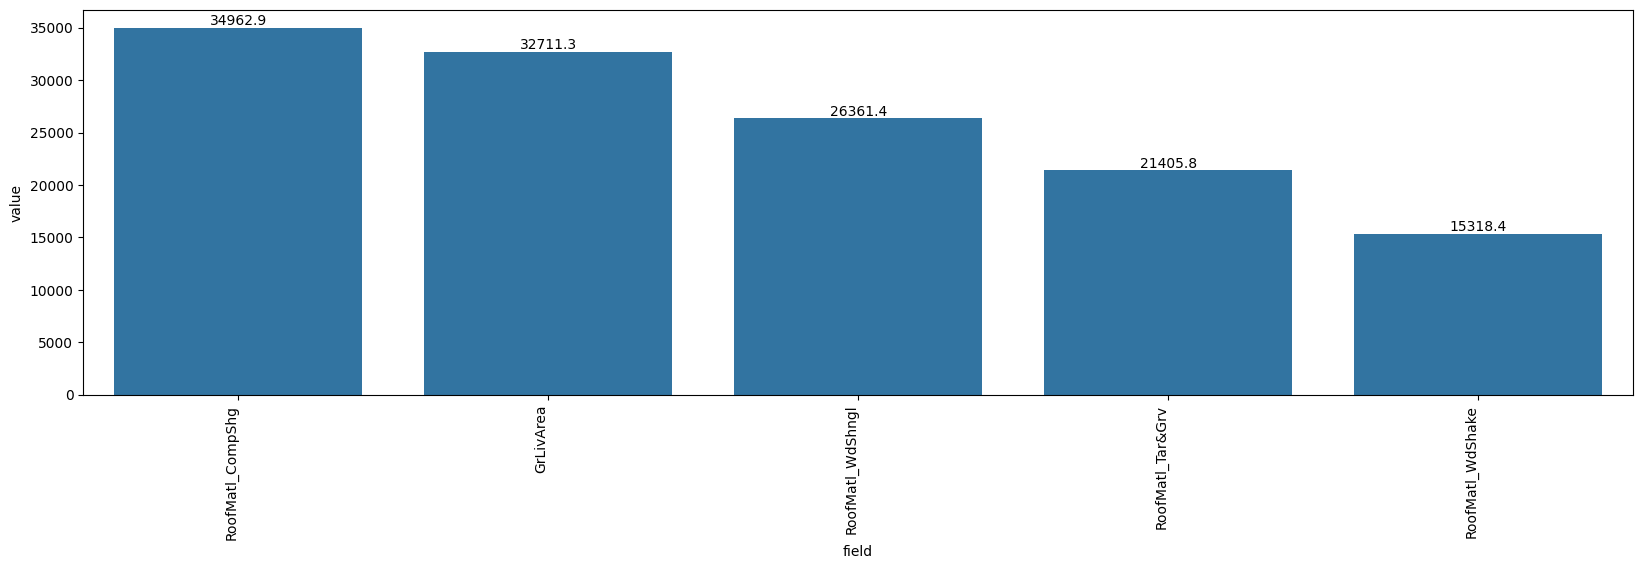

In [27]:
print("Evaluation metrics")
for k, v in lasso_metrics.items():
    print(f"{k} = {v}")

print("Intercept")
pprint(lasso.intercept_)

lasso_features = select_feature(X.columns.to_list(), lasso.coef_.tolist(), 5)
lasso_features

## We show the summary of model performance of each approach

In [28]:
metrics = [
    {"model": "linear_regression", **lr_metrics},
    {"model": "ridge_regressiona", **ridge_metrics},
    {"model": "lasso_regression", **lasso_metrics}
]

metrics_df = pd.DataFrame(metrics)
metrics_df

model  r2_train       r2_test     rss_train      rss_test  \
0  linear_regression  0.956370 -3.397583e+21  2.681288e+11  8.357223e+33   
1  ridge_regressiona  0.880784  8.301087e-01  7.326465e+11  4.178911e+11   
2   lasso_regression  0.924912  8.253148e-01  4.614570e+11  4.296830e+11   

      mse_train      mse_test  
0  2.778537e+08  2.018653e+31  
1  7.592192e+08  1.009399e+09  
2  4.781938e+08  1.037882e+09

## We show the R2 score of model performance of each approach on Train and Test dataset

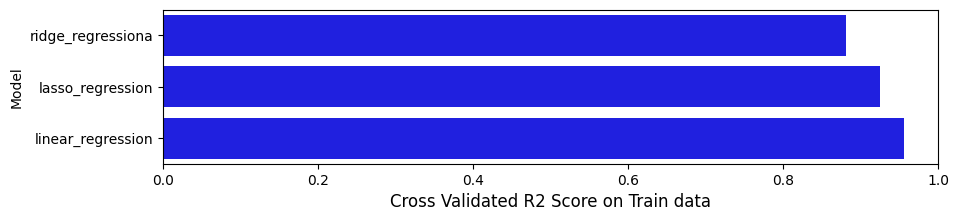

In [29]:
# Visualize model performance
f, axe = plt.subplots(1,1, figsize=(10,2))

metrics_df.sort_values(by=['r2_test'], ascending=False, inplace=True)

sns.barplot(x='r2_train', y='model', data=metrics_df, ax = axe, color='blue')

axe.set_xlabel('Cross Validated R2 Score on Train data', size=12)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

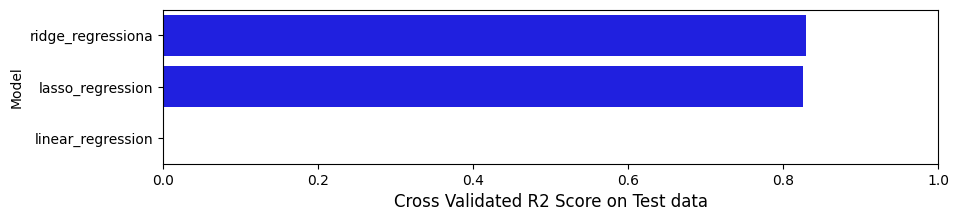

In [30]:
# Visualize model performance
f, axe = plt.subplots(1,1, figsize=(10,2))

metrics_df.sort_values(by=['r2_test'], ascending=False, inplace=True)

sns.barplot(x='r2_test', y='model', data=metrics_df, ax = axe, color='blue')

axe.set_xlabel('Cross Validated R2 Score on Test data', size=12)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

## Analytic Questions


### Question 1
1. What is the optimal value of alpha for ridge and lasso regression? 
2. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
3. What will be the most important predictor variables after the change is implemented?

Train model with the best Ridge alpha 1000


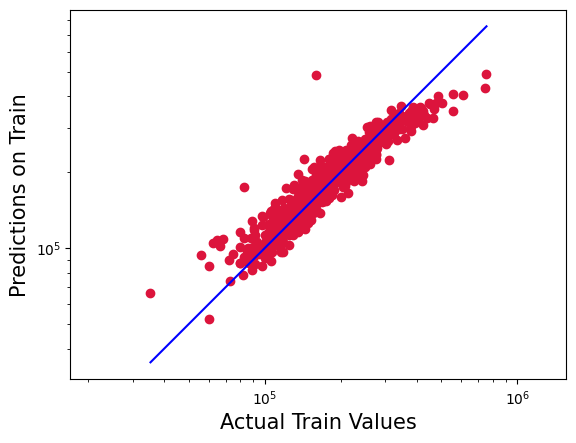

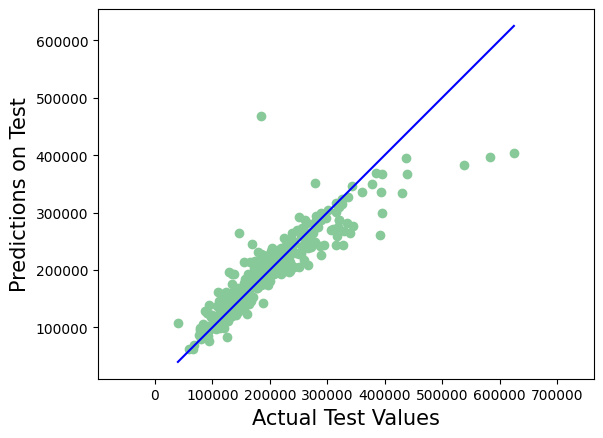

Evaluation metrics
Evaluation metrics
r2_train = 0.8536139547929369
r2_test = 0.8188849207221628
rss_train = 899621400537.7217
rss_test = 445498844624.30853
mse_train = 932250155.9976391
mse_test = 1076084165.7591994
Intercept
185792.29479200343


field        value     abs_coef
12          GrLivArea  8386.400940  8386.400940
18         GarageCars  6130.817147  6130.817147
117     OverallQual_9  5706.252991  5706.252991
129  RoofMatl_WdShngl  5280.457011  5280.457011
9         TotalBsmtSF  5081.510813  5081.510813

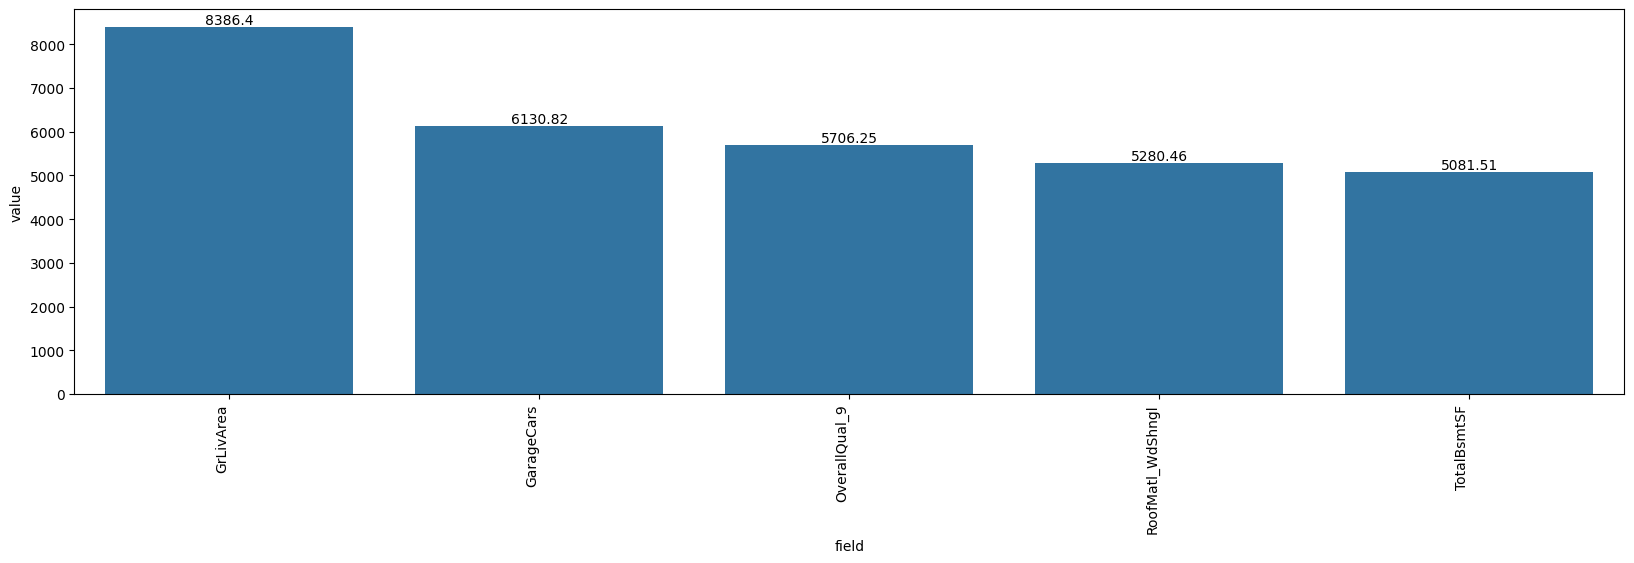

In [31]:
#  Run double alpha of Ridge
best_alpha = 500

new_ridge, new_ridge_metrics = run_ridge(
    best_alpha*2,
    X_train,
    y_train,
    X_test,
    y_test
    )

print("Evaluation metrics")
print("Evaluation metrics")
for k, v in new_ridge_metrics.items():
    print(f"{k} = {v}")

print("Intercept")
pprint(new_ridge.intercept_)

select_feature(X.columns.to_list(), new_ridge.coef_.tolist(), 5)

The best Lasso Alpha: 1000


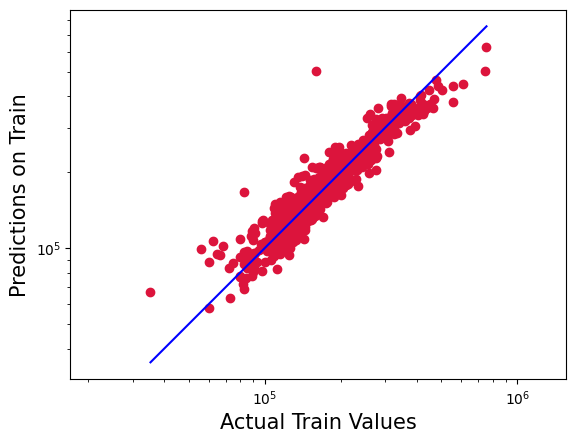

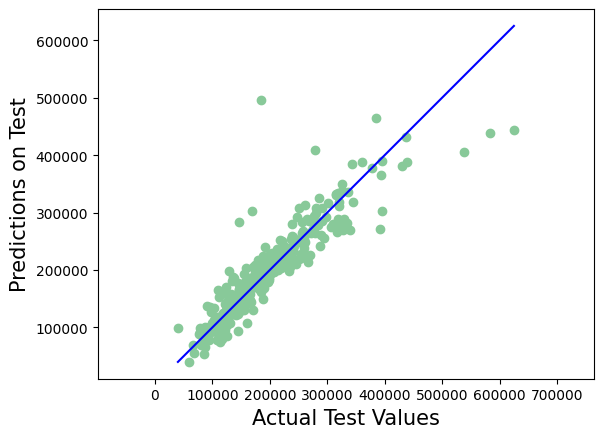

Evaluation metrics
r2_train = 0.8910418396942311
r2_test = 0.8283324550295457
rss_train = 669606810100.2289
rss_test = 422260218468.6639
mse_train = 693893067.461377
mse_test = 1019952218.5233427
Intercept
185838.77195840498


field         value      abs_coef
12          GrLivArea  30973.367381  30973.367381
129  RoofMatl_WdShngl   9668.235926   9668.235926
18         GarageCars   9357.818382   9357.818382
117     OverallQual_9   9026.523883   9026.523883
3           YearBuilt   7858.200000   7858.200000

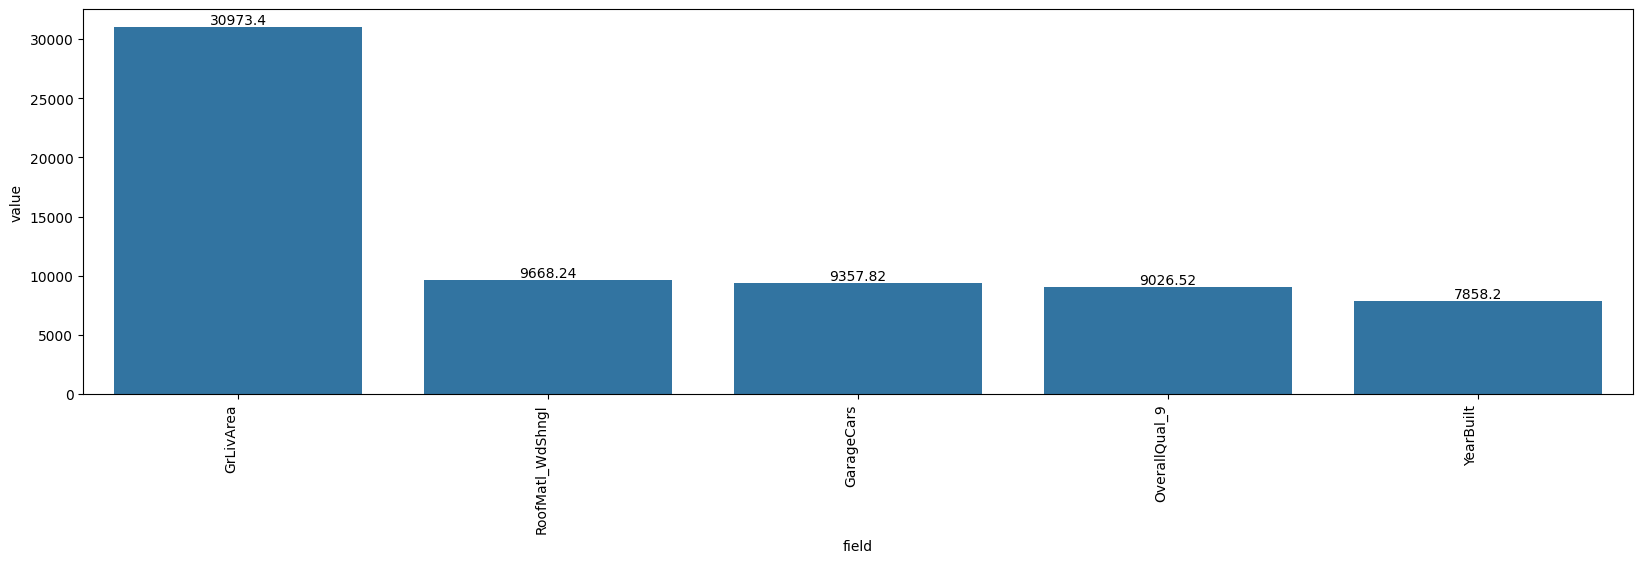

In [32]:
#  Run double alpha of Ridge
best_alpha = 500

new_lasso, new_lasso_metrics = run_lasso(
    best_alpha*2,
    X_train,
    y_train,
    X_test,
    y_test
    )

print("Evaluation metrics")
for k, v in new_lasso_metrics.items():
    print(f"{k} = {v}")

print("Intercept")
pprint(new_lasso.intercept_)

select_feature(X.columns.to_list(), new_lasso.coef_.tolist(), 5)

### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Answer


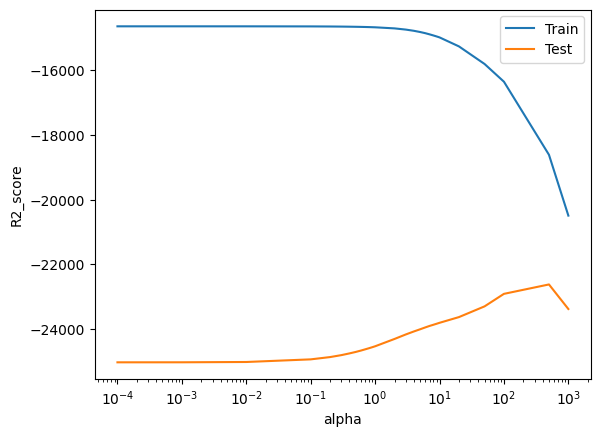

Train model with the best Ridge alpha 500


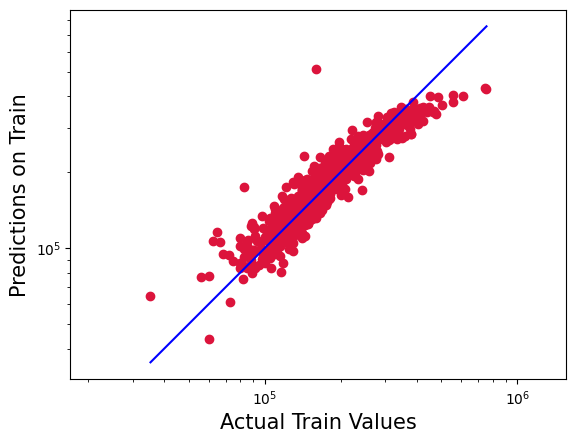

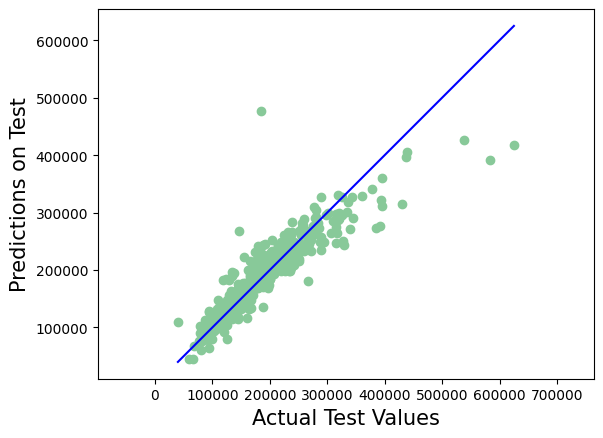

Evaluation metrics
{'mse_test': 1121863212.80948,
 'mse_train': 1040708105.3571286,
 'r2_test': 0.8111798768235512,
 'r2_train': 0.8365834075992888,
 'rss_test': 464451370103.1247,
 'rss_train': 1004283321669.6292}
Intercept
185724.75250606998


field        value     abs_coef
9            TotalBsmtSF  7953.262132  7953.262132
10              2ndFlrSF  7557.634106  7557.634106
14              FullBath  7366.997089  7366.997089
5             MasVnrArea  6596.786769  6596.786769
72  Neighborhood_NridgHt  5798.664866  5798.664866

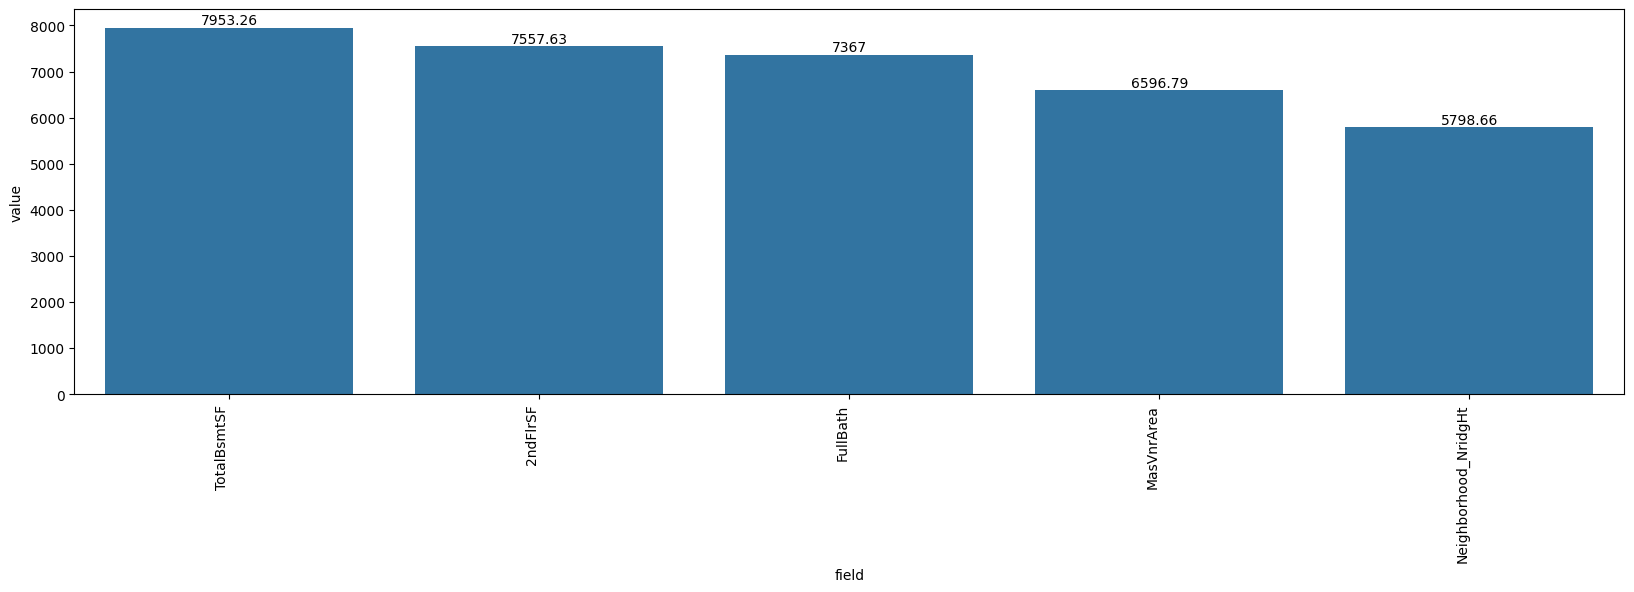

In [33]:
# Retrain for Ridge
top5_ridge_features = ridge_features.iloc[0:5, :]

ridge_new_X_train = X_train.drop(top5_ridge_features['field'].to_list(), axis=1, errors='ignore')
ridge_new_X_test = X_test.drop(top5_ridge_features['field'].to_list(), axis=1, errors='ignore')

new_ridge_cv = get_grid_search(Ridge(), ridge_new_X_train, y_train)

new_ridge, new_ridge_metrics = run_ridge(
    new_ridge_cv.best_params_['alpha'],
    ridge_new_X_train,
    y_train,
    ridge_new_X_test,
    y_test
    )

print("Evaluation metrics")
pprint(new_ridge_metrics)

print("Intercept")
pprint(new_ridge.intercept_)


select_feature(ridge_new_X_train.columns.to_list(), new_ridge.coef_.tolist(), 5)




/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+11, tolerance: 4.732e+08
  model = cd_fast.enet_coordinate_descent(
/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.308e+11, tolerance: 5.304e+08
  model = cd_fast.enet_coordinate_descent(
/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

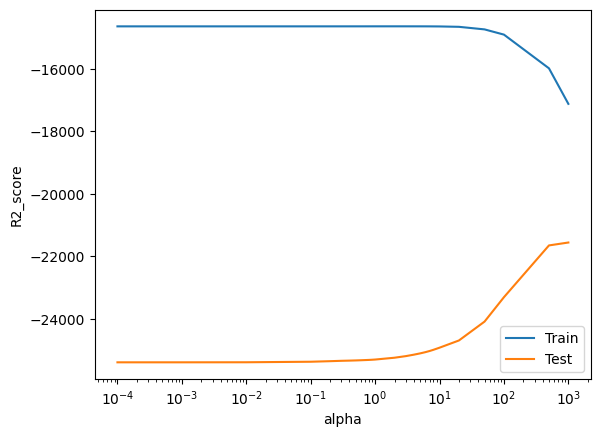

Train model with the best Ridge alpha 1000


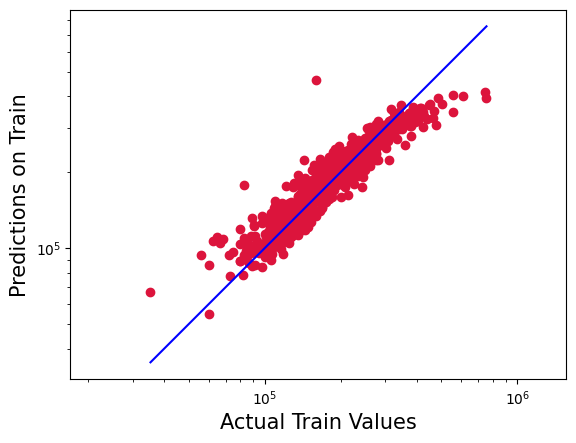

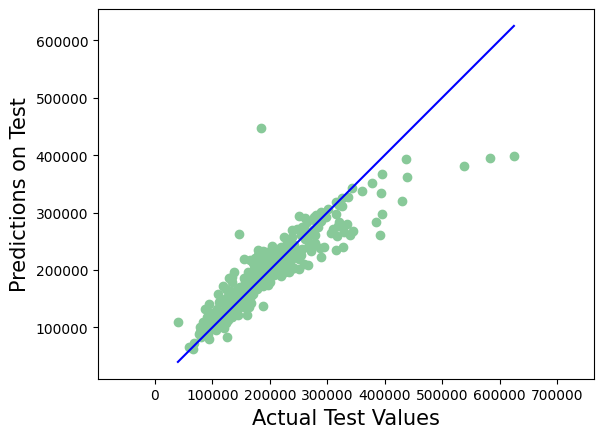

Evaluation metrics
{'mse_test': 1122680734.050372,
 'mse_train': 1071616457.2105293,
 'r2_test': 0.8110422803147772,
 'r2_train': 0.8317300414050555,
 'rss_test': 464789823896.854,
 'rss_train': 1034109881208.1608}
Intercept
185672.20937207036


field        value     abs_coef
17             GarageCars  6634.520145  6634.520145
9             TotalBsmtSF  6114.817586  6114.817586
116         OverallQual_9  5812.253048  5812.253048
73   Neighborhood_NoRidge  5507.977723  5507.977723
14               FullBath  5293.853349  5293.853349

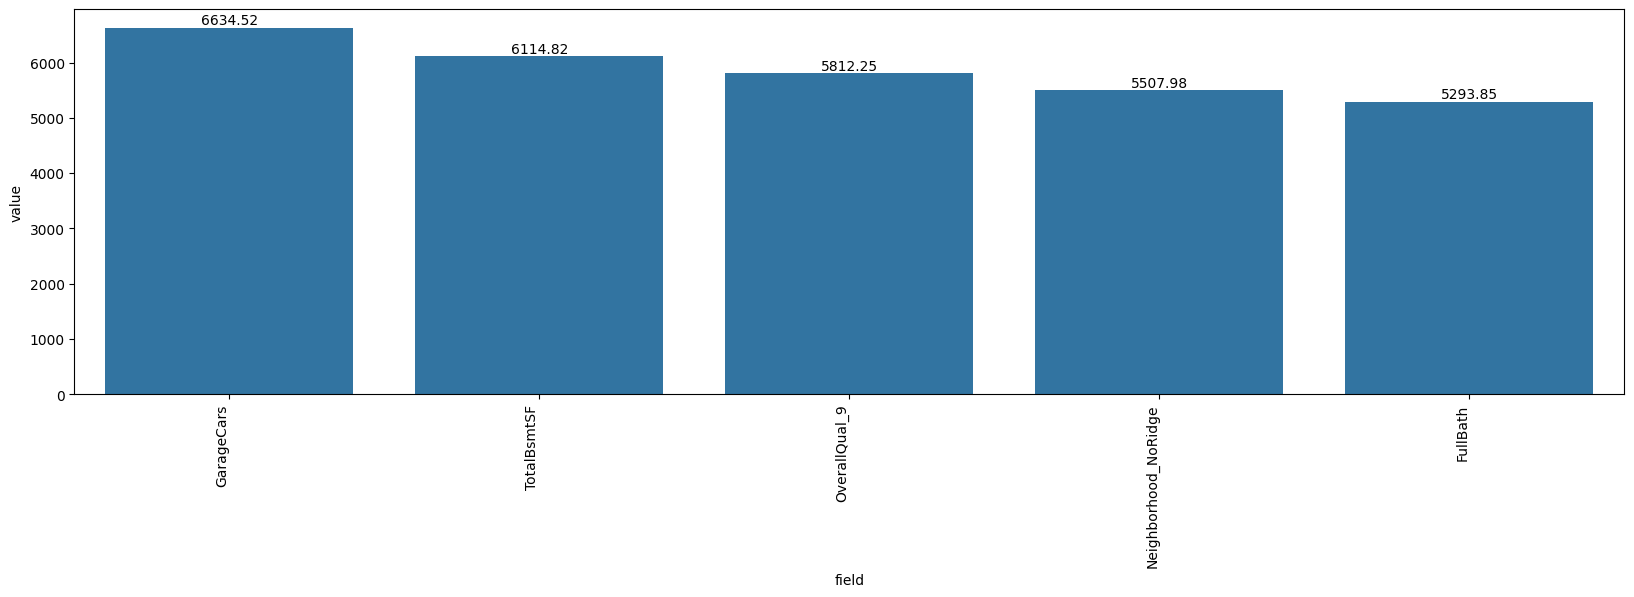

In [34]:
# Retrain for Lasso
top5_lasso_features = lasso_features.iloc[0:5, :]

lasso_new_X_train = X_train.drop(top5_lasso_features['field'].to_list(), axis=1, errors='ignore')
lasso_new_X_test = X_test.drop(top5_lasso_features['field'].to_list(), axis=1, errors='ignore')

new_lasso_cv = get_grid_search(Lasso(), ridge_new_X_train, y_train)

new_lasso, new_lasso_metrics = run_ridge(
    new_lasso_cv.best_params_['alpha'],
    lasso_new_X_train,
    y_train,
    lasso_new_X_test,
    y_test
    )

print("Evaluation metrics")
pprint(new_lasso_metrics)

print("Intercept")
pprint(new_lasso.intercept_)

select_feature(lasso_new_X_train.columns.to_list(), new_lasso.coef_.tolist(), 5)

### Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?